# 변수설명

- gender: 성별
- car: 차량 소유 여부
- reality: 부동산 소유 여부
- child_num: 자녀 수
- income_total: 연간 소득
- income_type: 소득 분류
							['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']

- edu_type: 교육 수준
							['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']

- family_type: 결혼 여부
							['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']

- house_type: 생활 방식
							['Municipal apartment', 'House / apartment', 'With parents',

							 'Co-op apartment', 'Rented apartment', 'Office apartment']

- DAYS_BIRTH: 출생일
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미

- DAYS_EMPLOYED: 업무 시작일
							데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미

							양수 값은 고용되지 않은 상태를 의미함

- FLAG_MOBIL: 핸드폰 소유 여부
- work_phone: 업무용 전화 소유 여부
- phone: 전화 소유 여부
- email: 이메일 소유 여부
- occyp_type: 직업 유형													
- family_size: 가족 규모
- begin_month: 신용카드 발급 월

# 라이브러리

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

Mounted at /content/drive


# CSV 파일 읽기

In [2]:
train = pd.read_csv('/content/drive/MyDrive/프로젝트/신용카드 사용자 연체/train.csv')

# 데이터 정보

In [3]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [4]:
train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'occyp_type', 'family_size', 'begin_month', 'credit'],
      dtype='object')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

- occyp_type에서 결측치 존재

In [6]:
train.isna().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

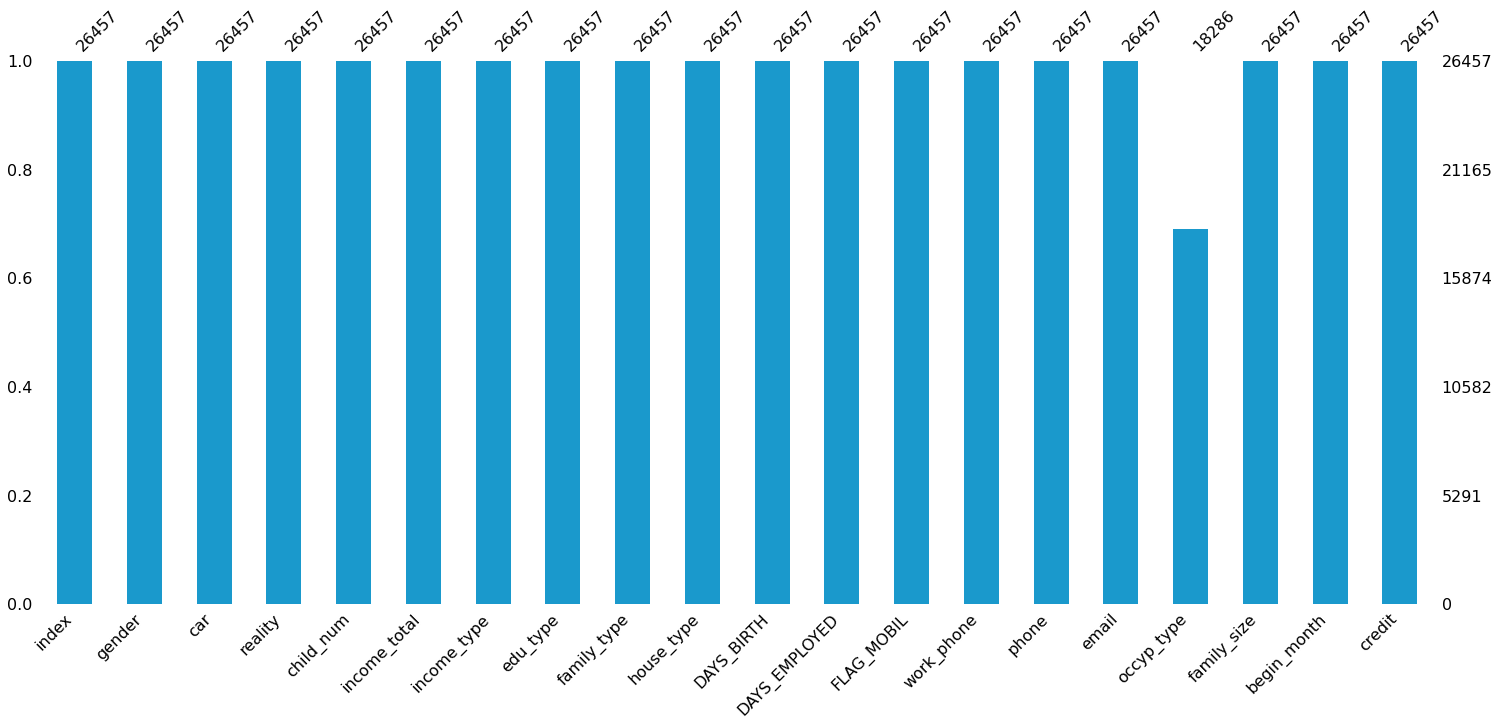

In [7]:
msno.bar(df=train.iloc[:, :], color=(0.1, 0.6, 0.8))

# 데이터 불균형 

- under sampling 이나 over sampling 사용해서 해결할 계획 

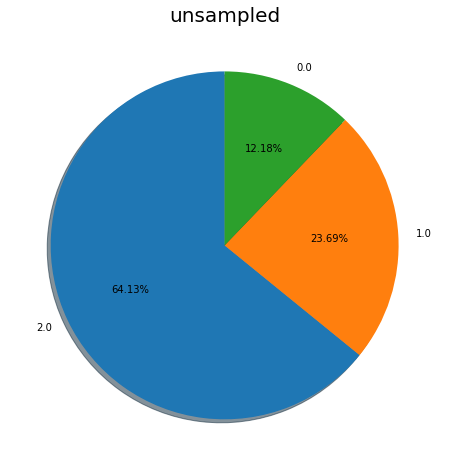

In [9]:
plt.subplots(figsize = (8,8))
plt.pie(train['credit'].value_counts(), labels = train['credit'].value_counts().index, 
        autopct="%.2f%%", shadow = True, startangle = 90)
plt.title('unsampled', size=20)
plt.show()

# 전체 분포

- 핸드폰 소유 여부: 모두 1

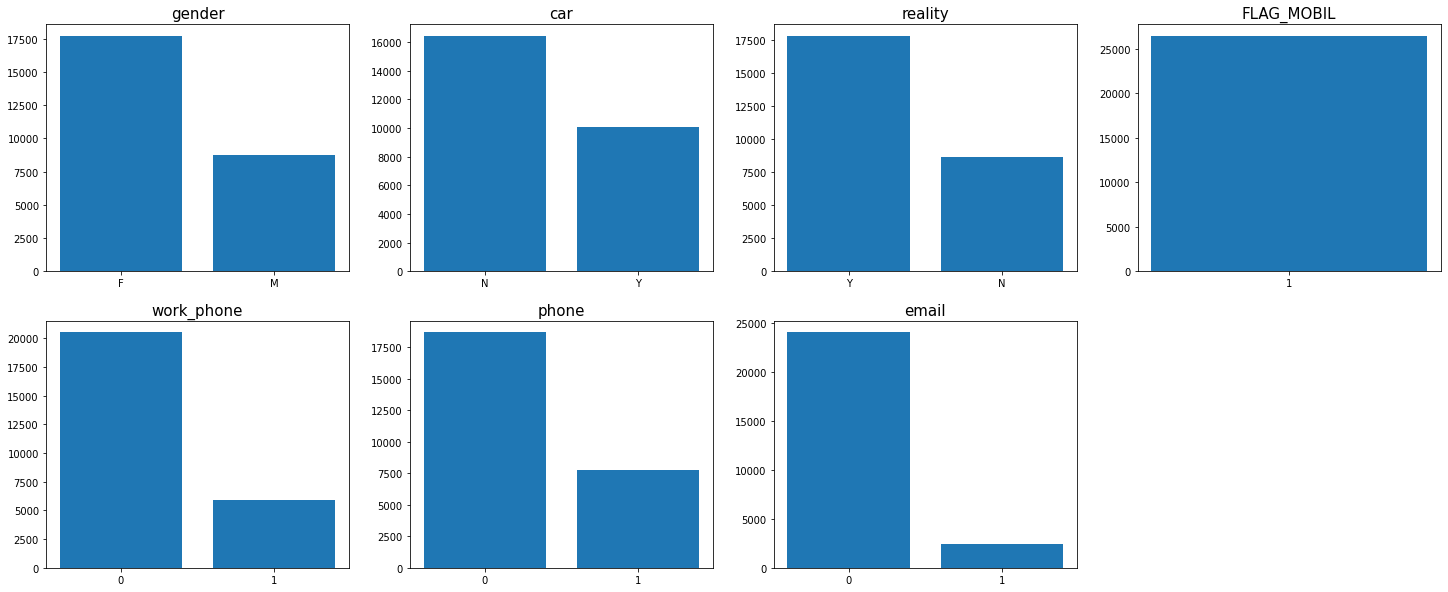

In [ ]:
col_list = ['gender', 'car', 'reality', 'FLAG_MOBIL', 
            'work_phone', 'phone', 'email']

plt.figure(figsize=(25, 10)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]
  vc = train[col].value_counts()

  plt.subplot(2, 4, i+1)
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys())
  plt.title(col, fontsize=15)

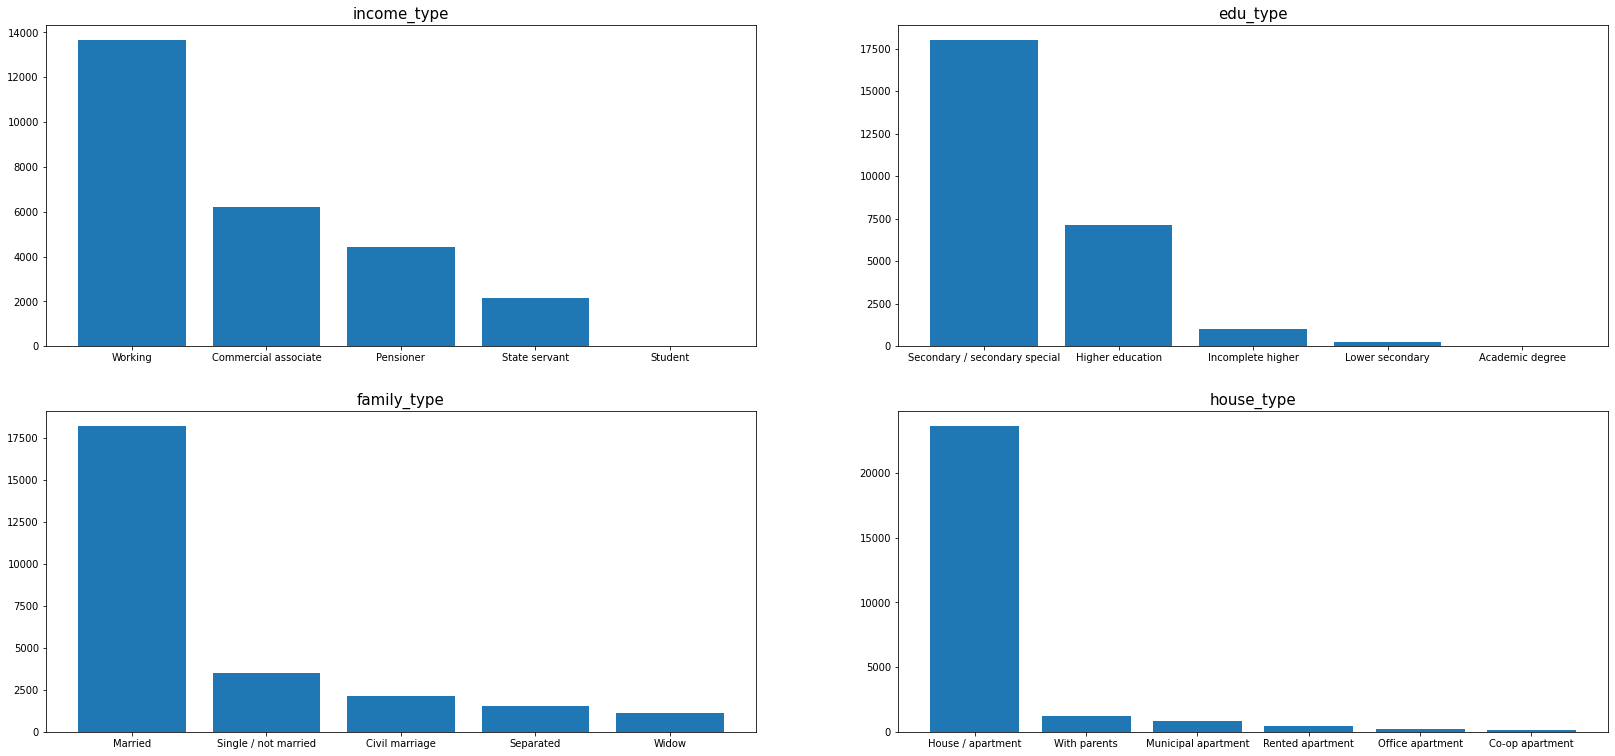

In [ ]:
col_list = ['income_type', 'edu_type', 
            'family_type', 'house_type']

plt.figure(figsize=(28, 13)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]
  vc = train[col].value_counts()

  plt.subplot(2, 2, i+1)
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys())
  plt.title(col, fontsize=15)

Text(0.5, 1.0, 'occyp_type')

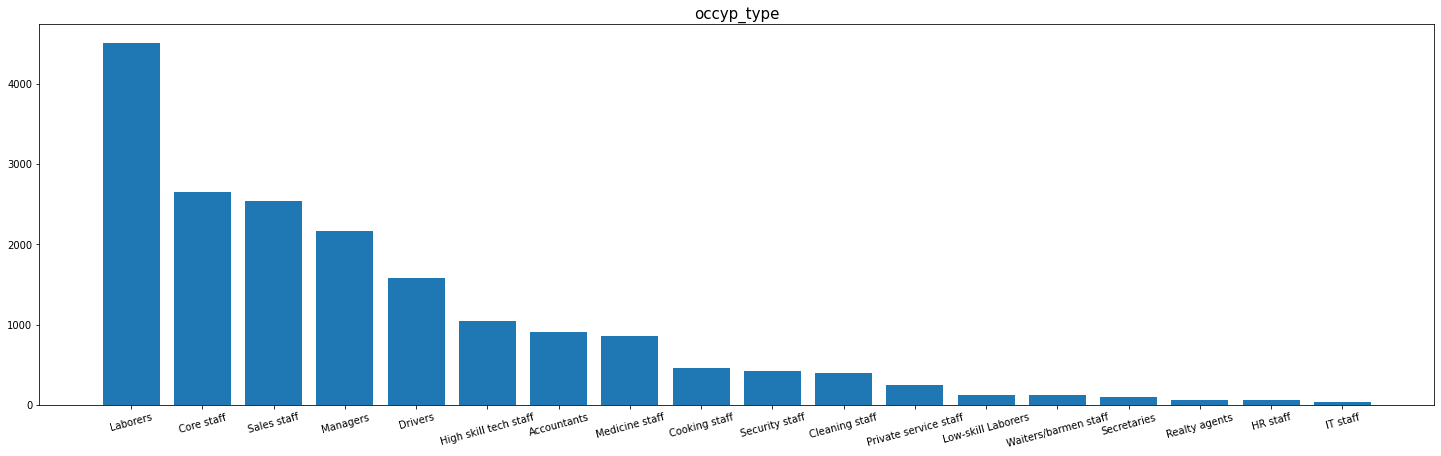

In [ ]:
col = 'occyp_type'

plt.figure(figsize=(25, 7)) # 가로, 세로 

vc = train[col].value_counts()

plt.bar(vc.keys(), vc.values)
plt.xticks(vc.keys(), rotation = 15)
plt.title(col, fontsize=15)

- 이상치 존재

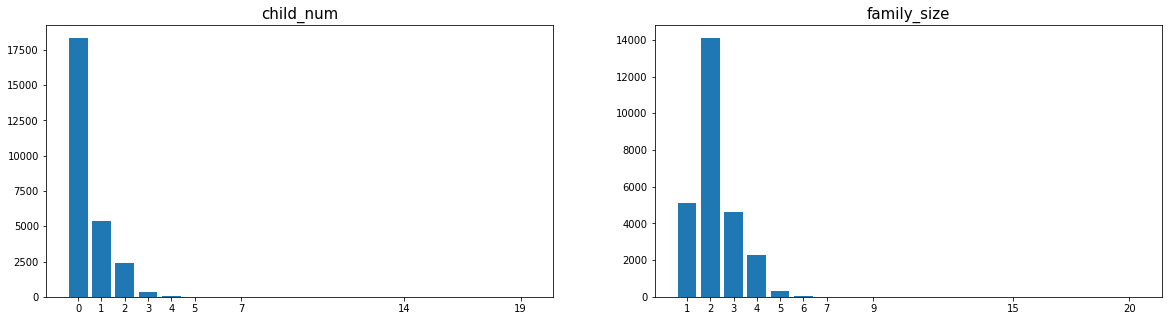

In [ ]:
col_list = ['child_num', 'family_size']

plt.figure(figsize=(20, 5)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]
  vc = train[col].value_counts()

  plt.subplot(1, 2, i+1)
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys())
  plt.title(col, fontsize=15)

- 업무 시작일: 양수 값 존재

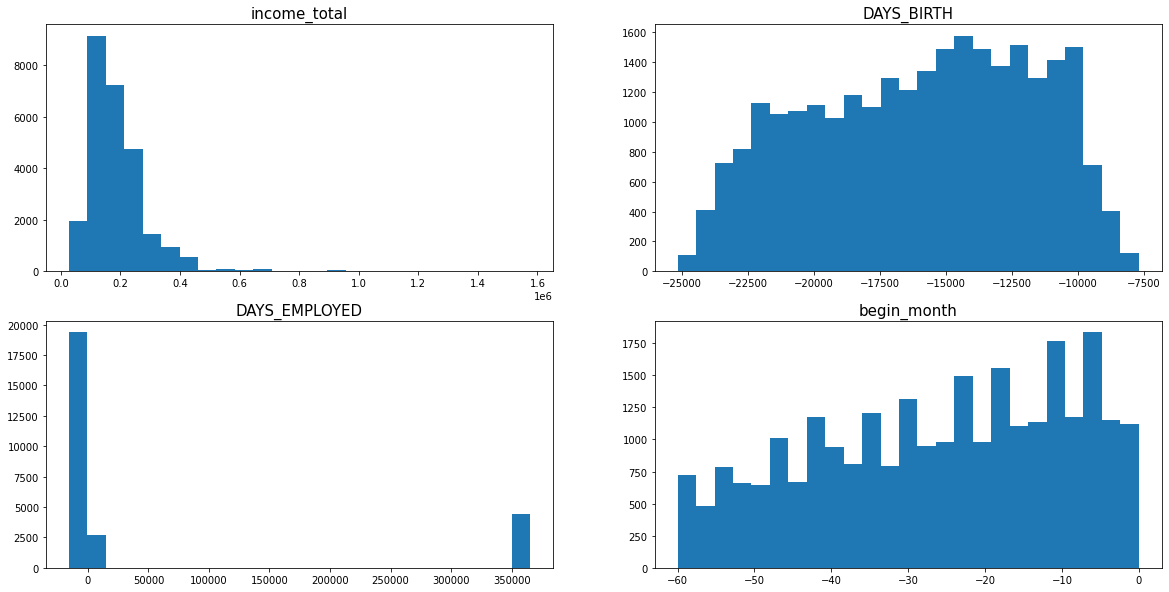

In [ ]:
col_list = ['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']
plt.figure(figsize=(20, 10)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]

  plt.subplot(2, 2, i+1)
  plt.hist(train[col], bins = 25)
  plt.title(col, fontsize=15)

# 신용등급 별 분포

In [ ]:
#신용등급 별 df
train0 = train[train['credit']==0]
train1 = train[train['credit']==1]
train2 = train[train['credit']==2]

def credit_bar(col):
  plt.figure(figsize=(28, 6)) # 가로, 세로 
  plt.suptitle(col, fontsize= 20)

  plt.subplot(1, 4, 1)
  vc = train[col].value_counts()
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys(), rotation = 45)
  plt.xlabel(col)
  plt.title('credit = 0,1,2', fontsize=15)

  plt.subplot(1, 4, 2)
  vc = train0[col].value_counts()
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys(), rotation = 45)
  plt.xlabel(col)
  plt.title('credit = 0', fontsize=15)

  plt.subplot(1, 4, 3)
  vc = train1[col].value_counts()
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys(), rotation = 45)
  plt.xlabel(col)
  plt.title('credit = 1', fontsize=15)

  plt.subplot(1, 4, 4)
  vc = train2[col].value_counts()
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys(), rotation = 45)
  plt.xlabel(col)
  plt.title('credit = 2', fontsize=15)

def occyp_type_bar(col):
  plt.figure(figsize=(28, 6)) # 가로, 세로 
  plt.suptitle(col, fontsize= 20)

  plt.subplot(1, 4, 1)
  vc = train[col].value_counts()
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys(), rotation = 90)
  plt.xlabel(col)
  plt.title('credit = 0,1,2', fontsize=15)

  plt.subplot(1, 4, 2)
  vc = train0[col].value_counts()
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys(), rotation = 90)
  plt.xlabel(col)
  plt.title('credit = 0', fontsize=15)

  plt.subplot(1, 4, 3)
  vc = train1[col].value_counts()
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys(), rotation = 90)
  plt.xlabel(col)
  plt.title('credit = 1', fontsize=15)

  plt.subplot(1, 4, 4)
  vc = train2[col].value_counts()
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys(), rotation = 90)
  plt.xlabel(col)
  plt.title('credit = 2', fontsize=15)

def credit_hist(col):
  plt.figure(figsize=(28, 7)) # 가로, 세로 
  plt.suptitle(col, fontsize= 22)

  plt.subplot(1, 4, 1)
  plt.hist(train[col], bins = 25)
  plt.xlabel(col)
  plt.title('credit = 0,1,2', fontsize=15)

  plt.subplot(1, 4, 2)
  plt.hist(train0[col], bins = 25)
  plt.xlabel(col)
  plt.title('credit = 0', fontsize=15)

  plt.subplot(1, 4, 3)
  plt.hist(train1[col], bins = 25)
  plt.xlabel(col)
  plt.title('credit = 1', fontsize=15)

  plt.subplot(1, 4, 4)
  plt.hist(train2[col], bins = 25)
  plt.xlabel(col)
  plt.title('credit = 2', fontsize=15)

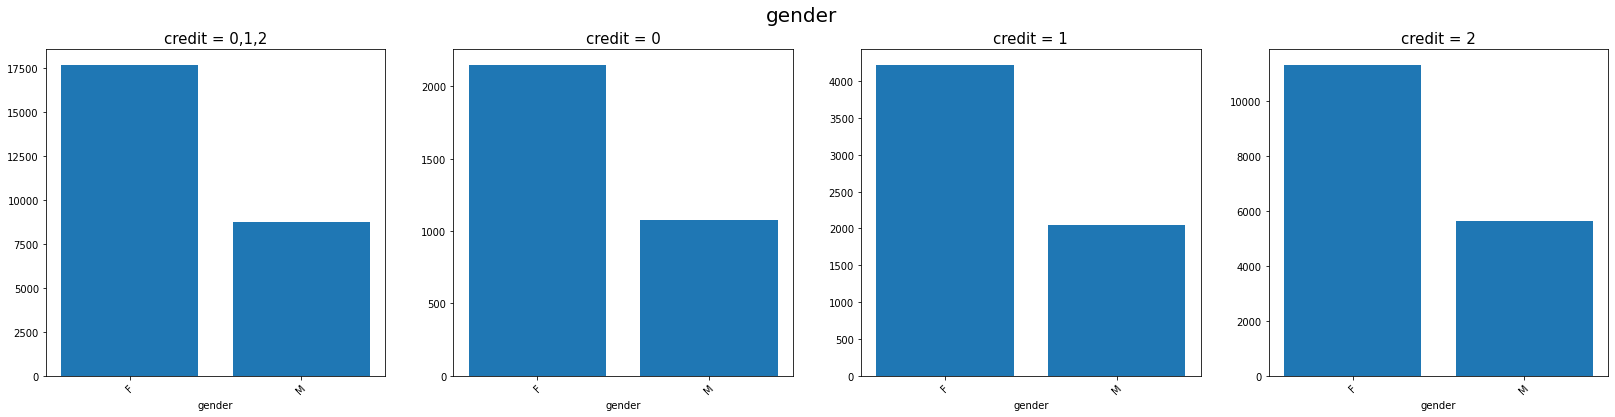

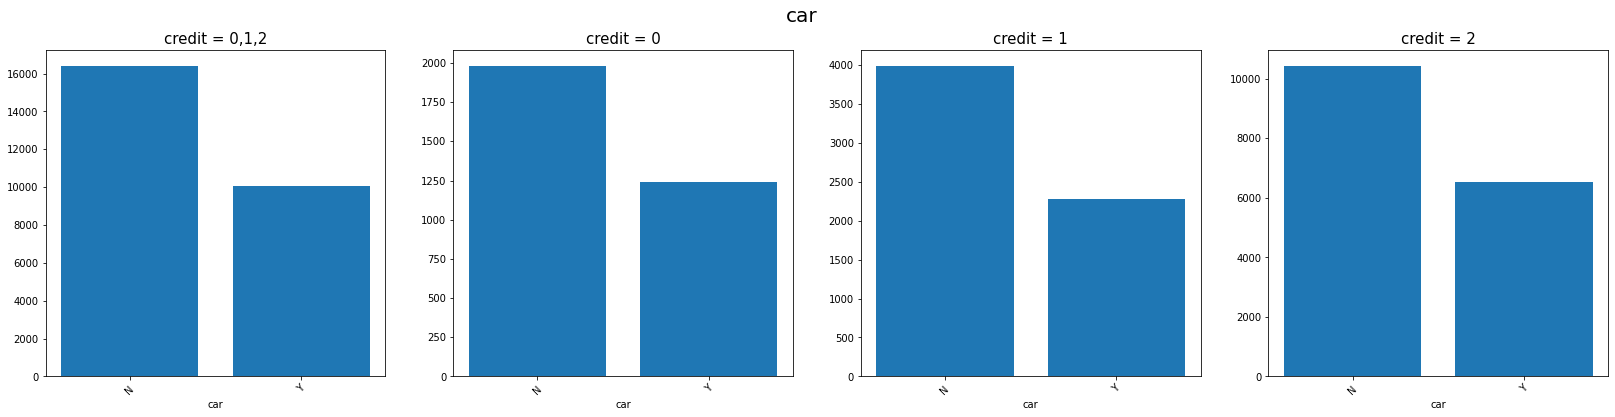

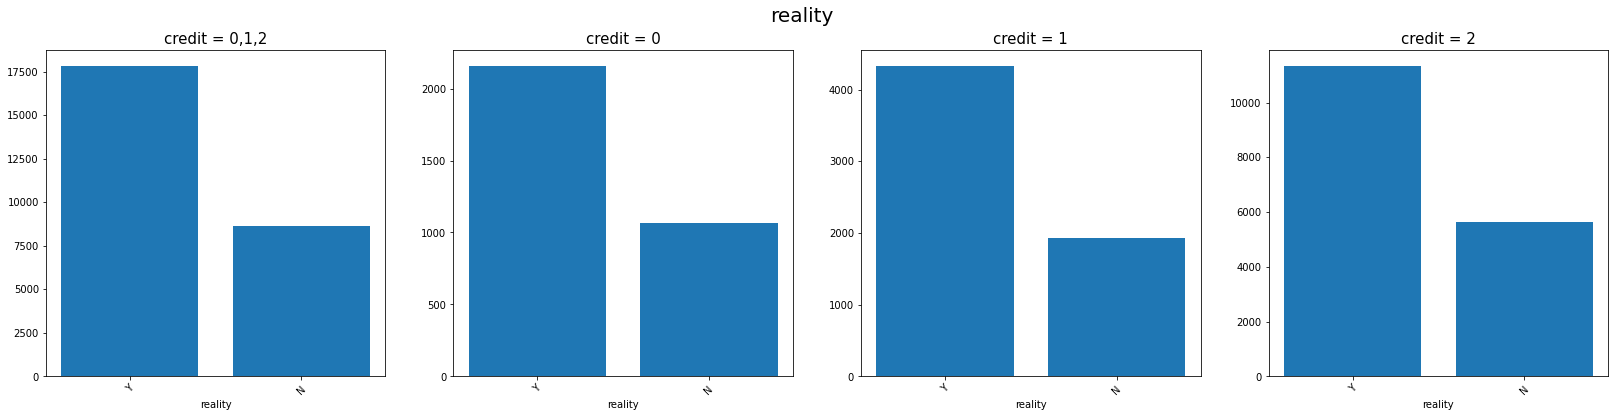

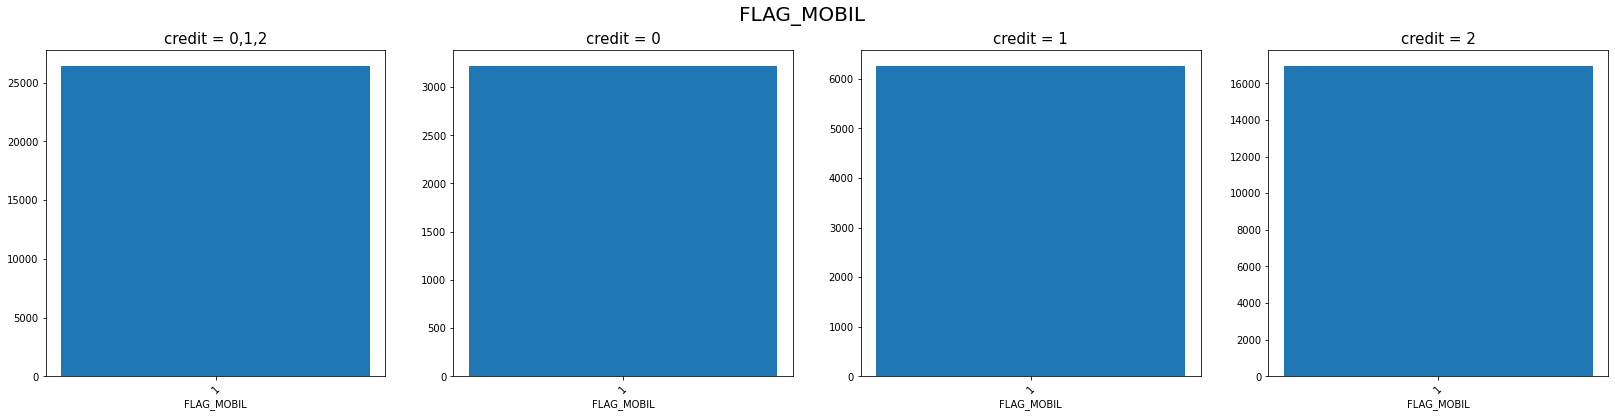

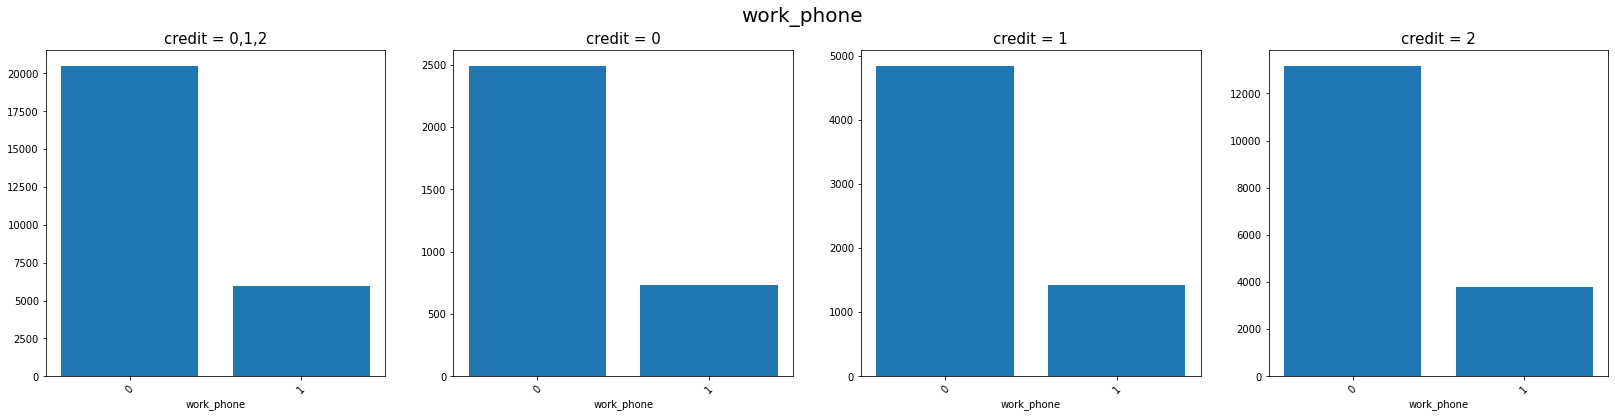

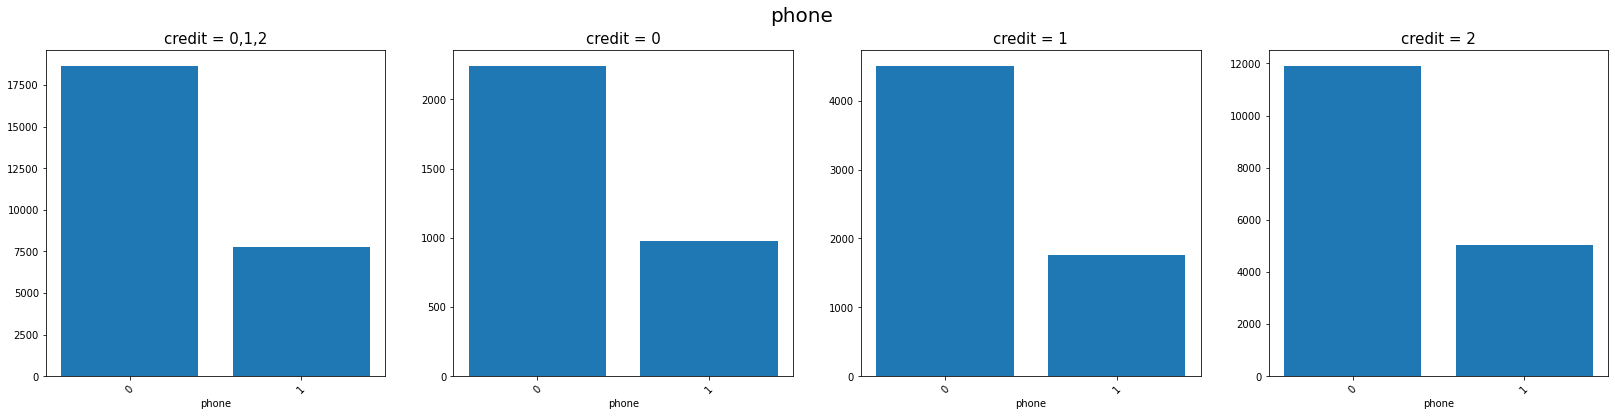

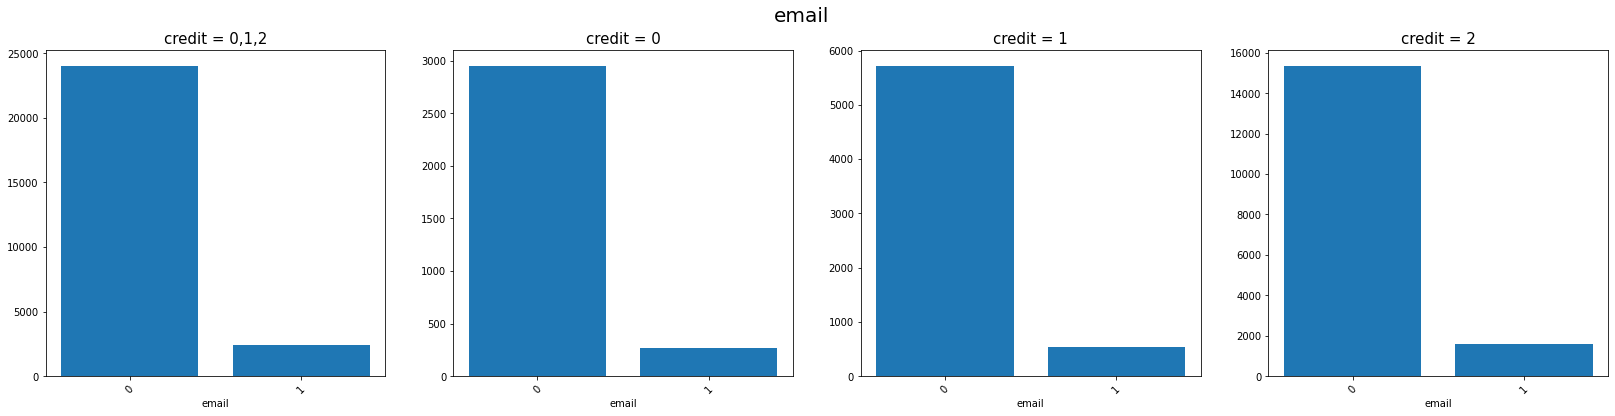

In [ ]:
col_list = ['gender', 'car', 'reality', 'FLAG_MOBIL', 'work_phone', 'phone', 'email']
for col in col_list:
  credit_bar(col)

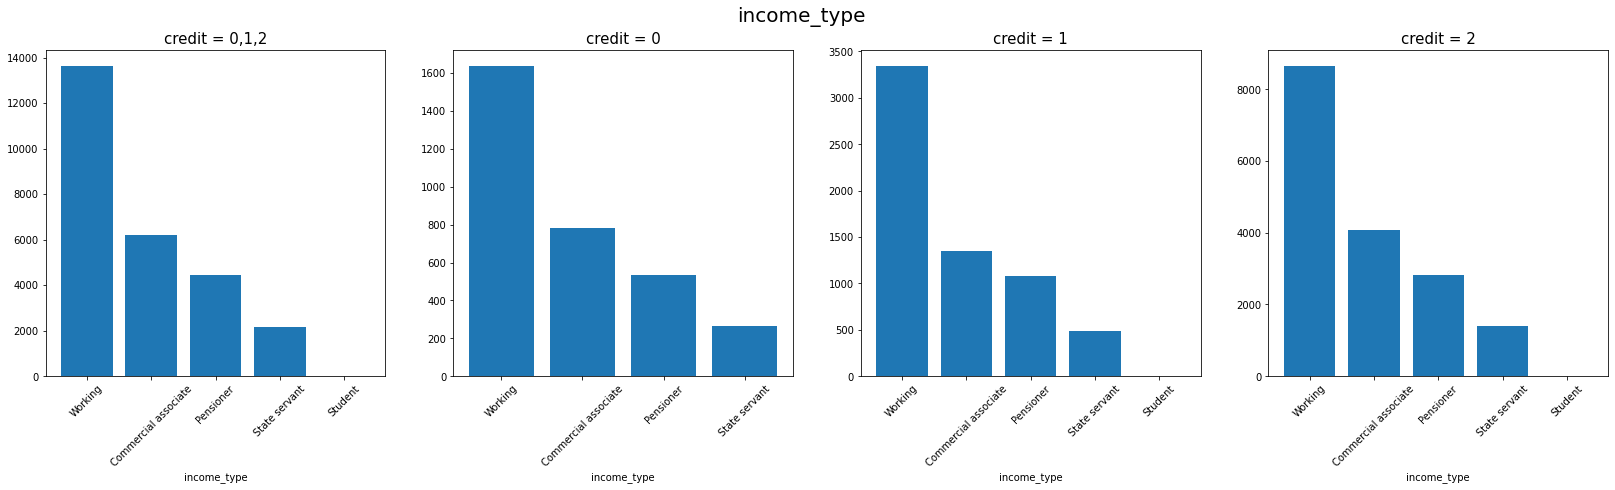

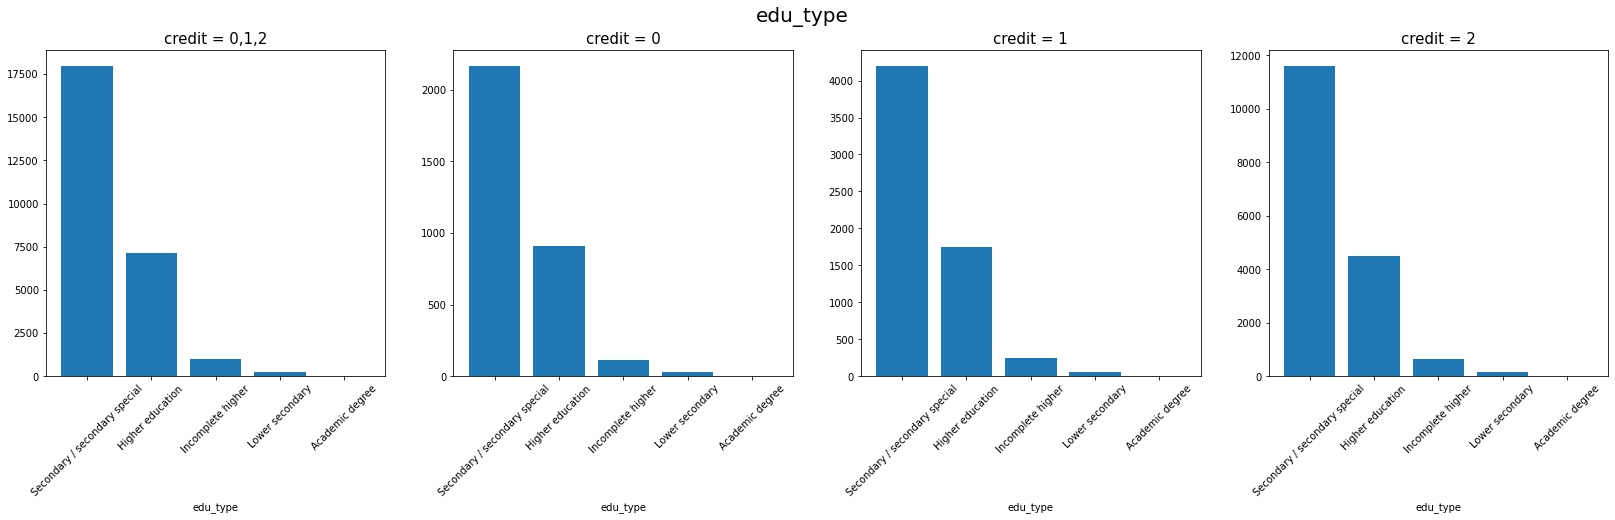

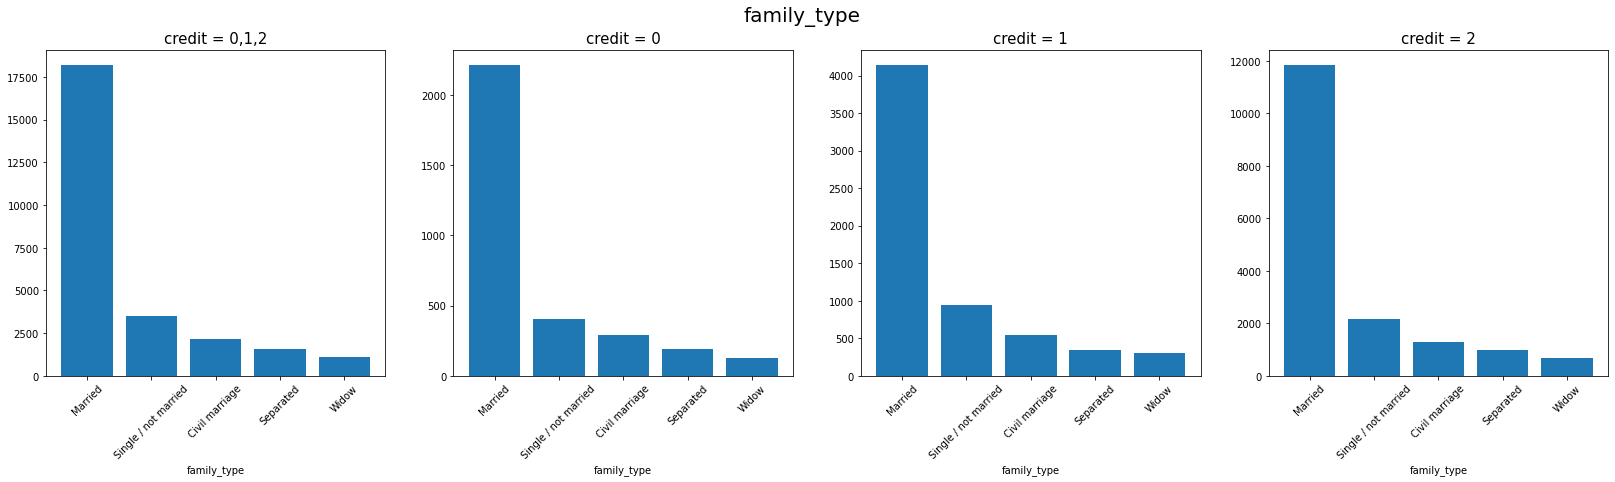

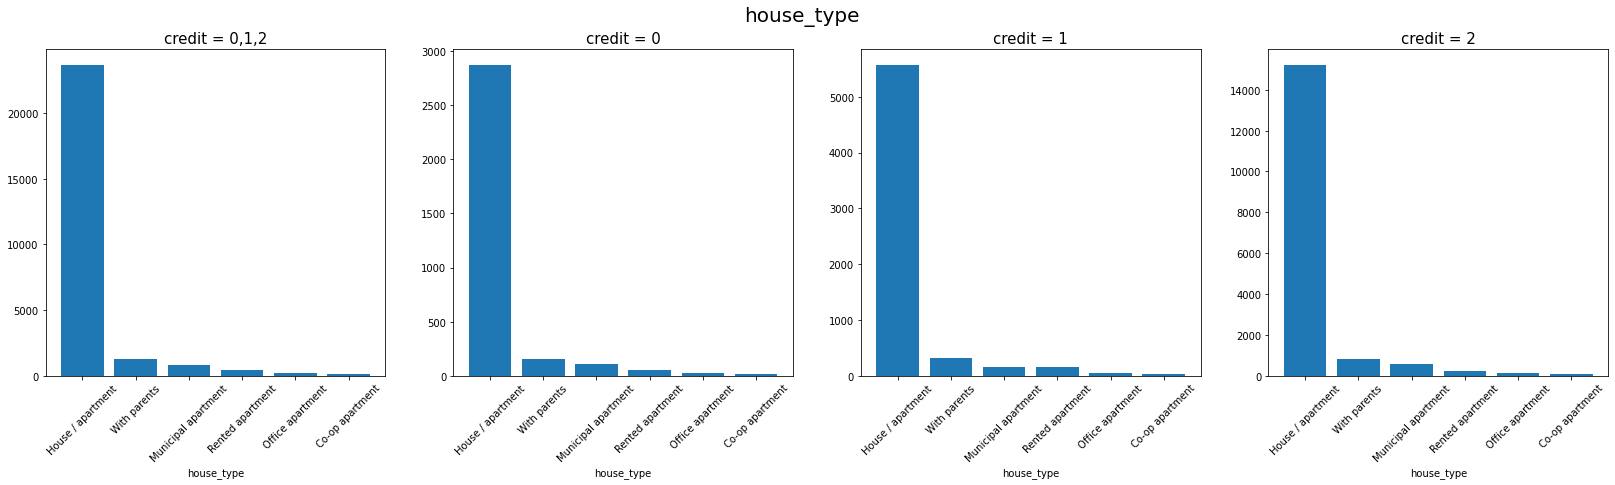

In [ ]:
col_list = ['income_type', 'edu_type', 'family_type', 'house_type']
for col in col_list:
  credit_bar(col)

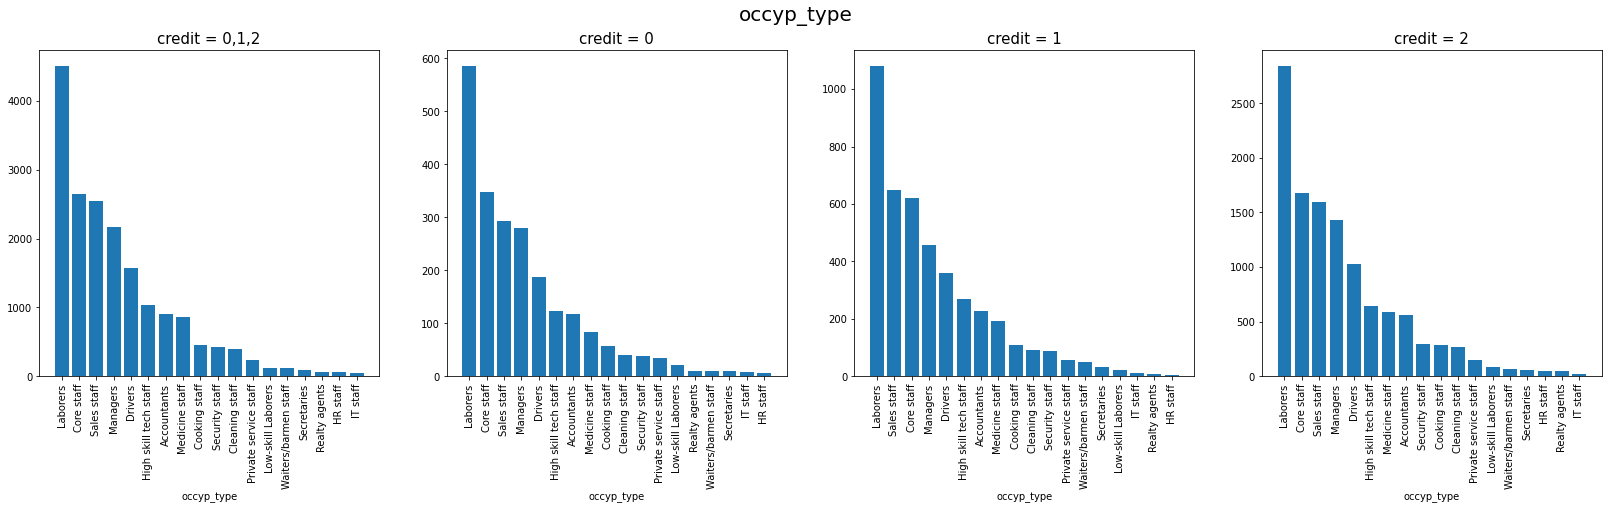

In [ ]:
occyp_type_bar('occyp_type')

- 자녀 수, 가족 규모: credit이 2 일 때 이상치들이 많이 발견됨 

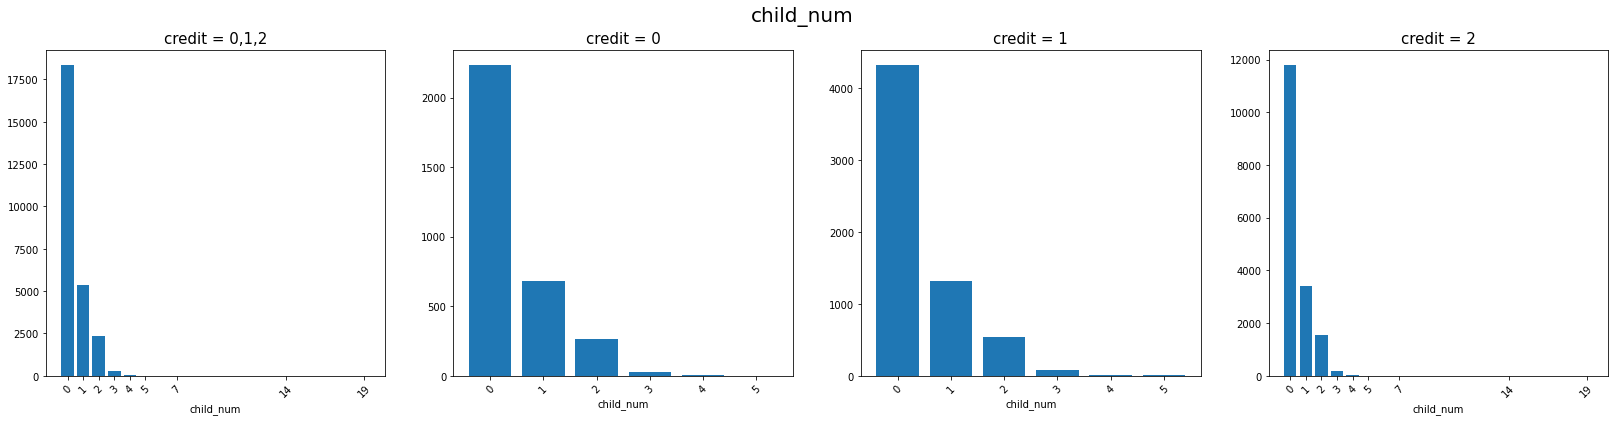

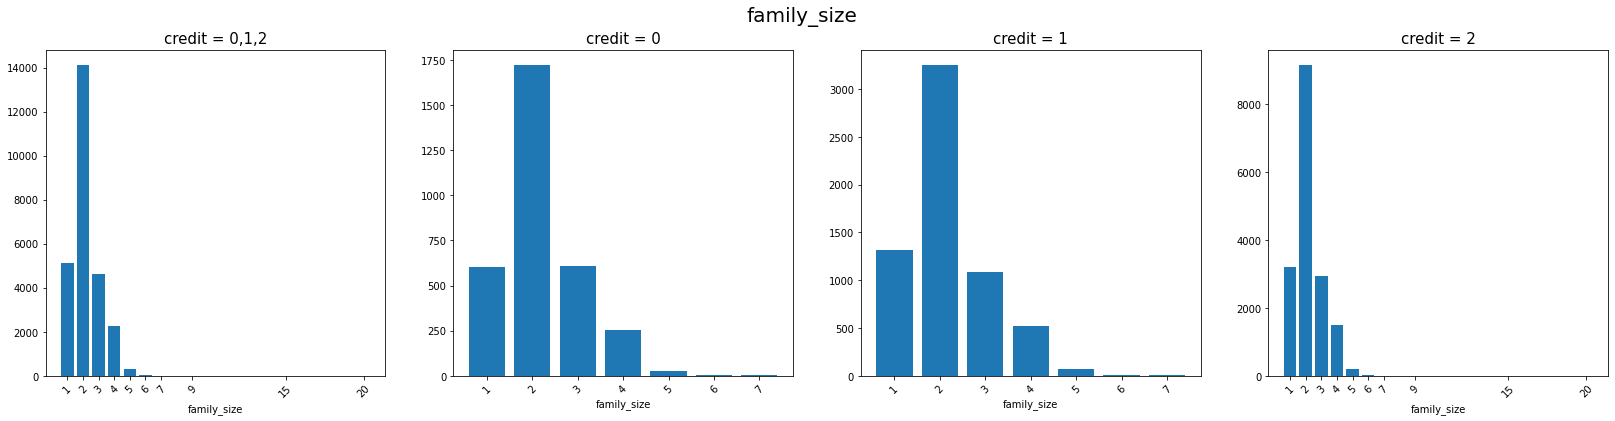

In [ ]:
col_list = ['child_num', 'family_size']
for col in col_list:
  credit_bar(col)

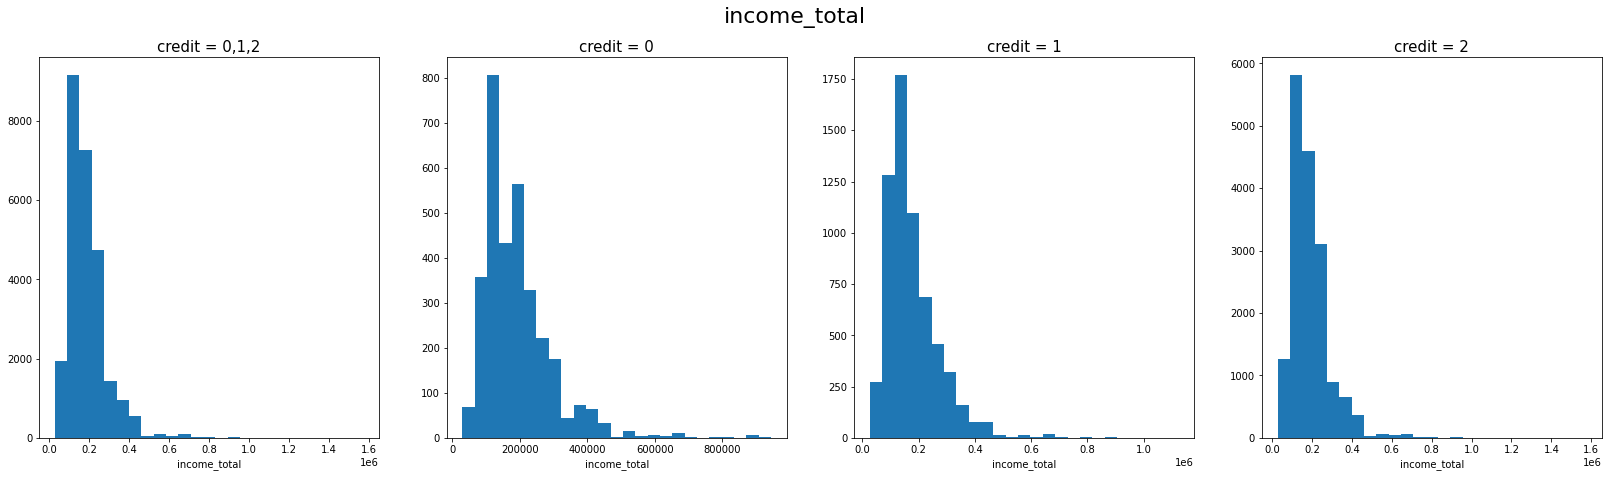

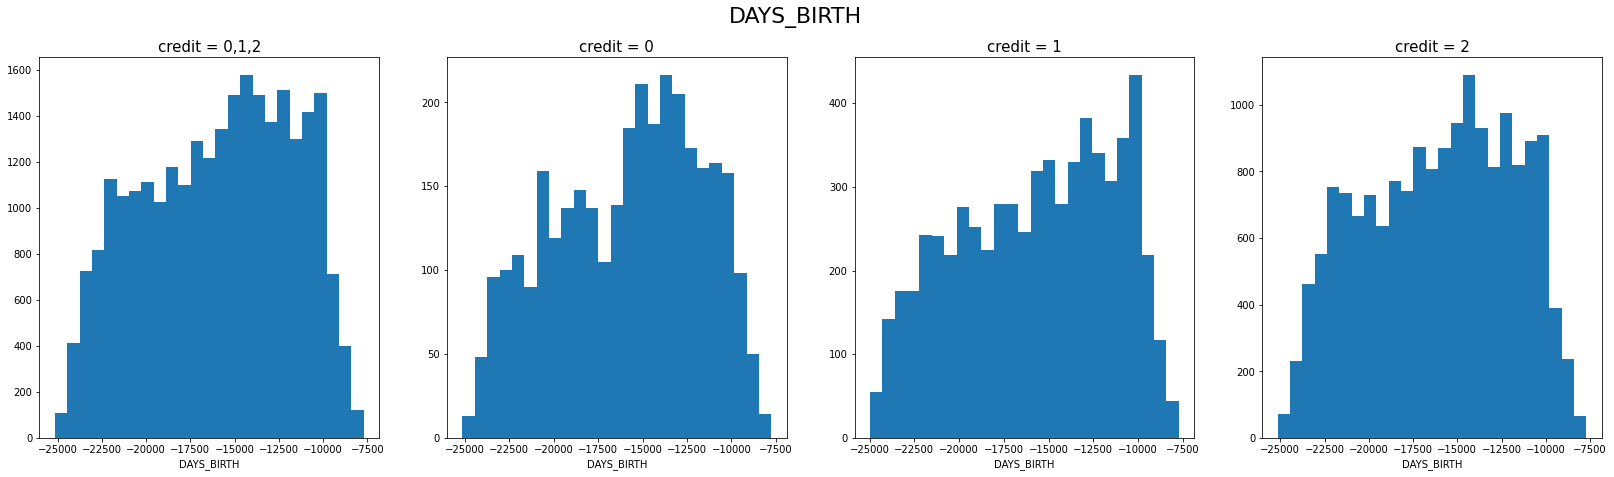

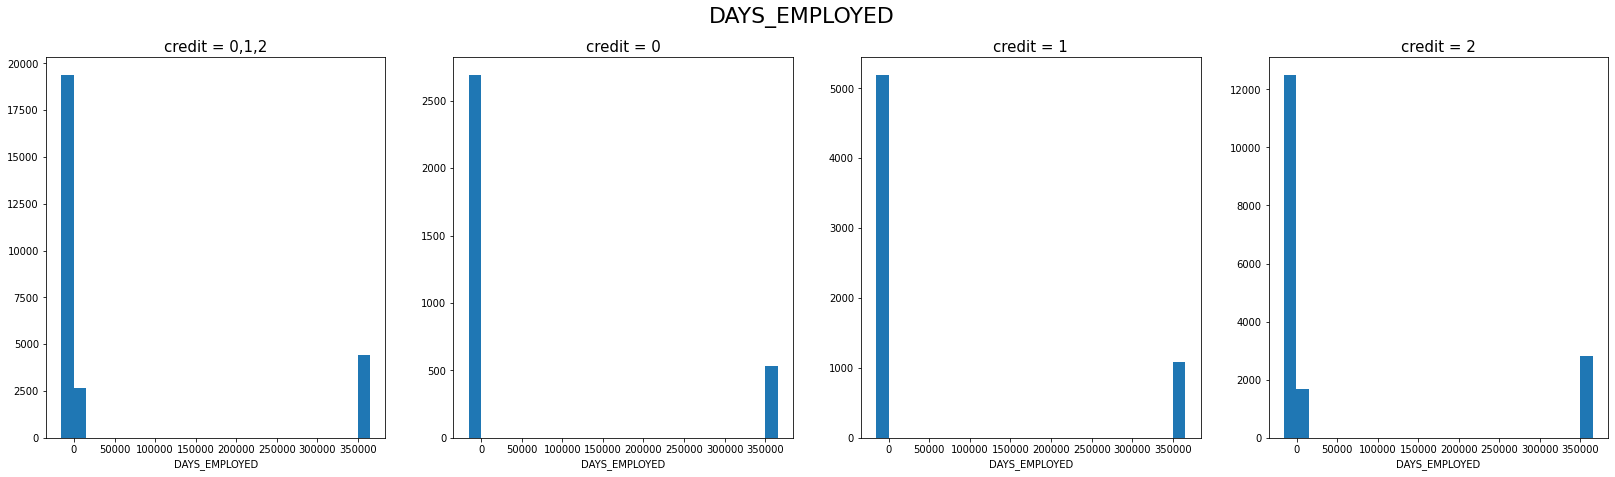

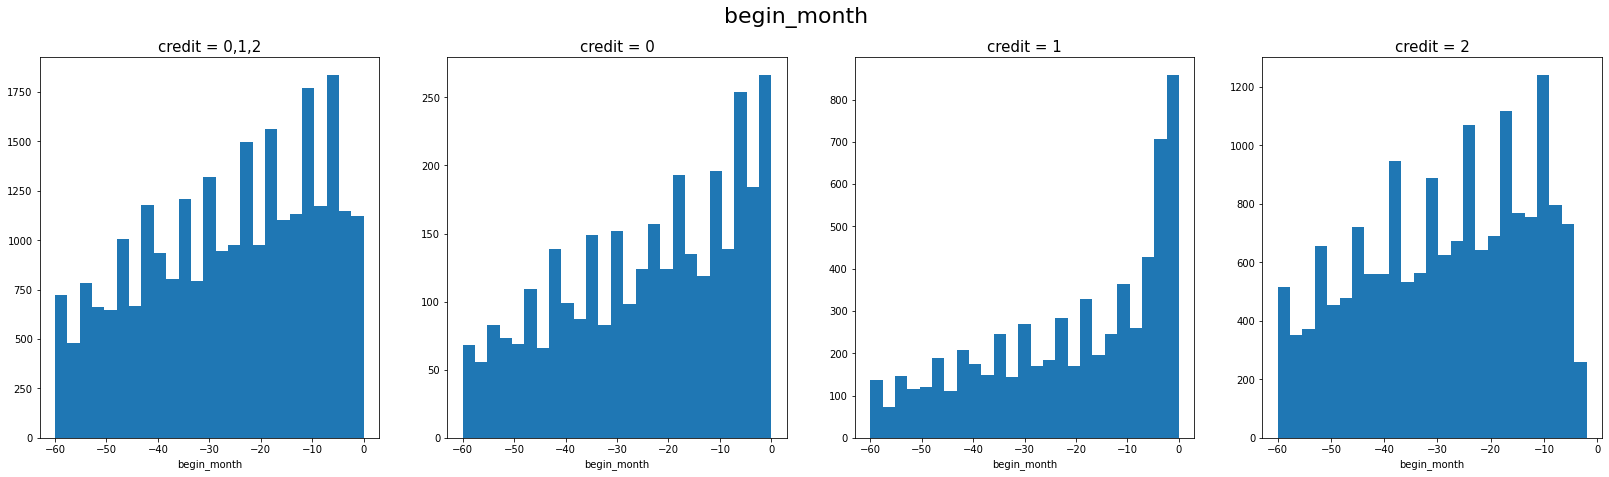

In [ ]:
col_list = ['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']
for col in col_list:
  credit_hist(col)

# 신용등급 별 boxplot 

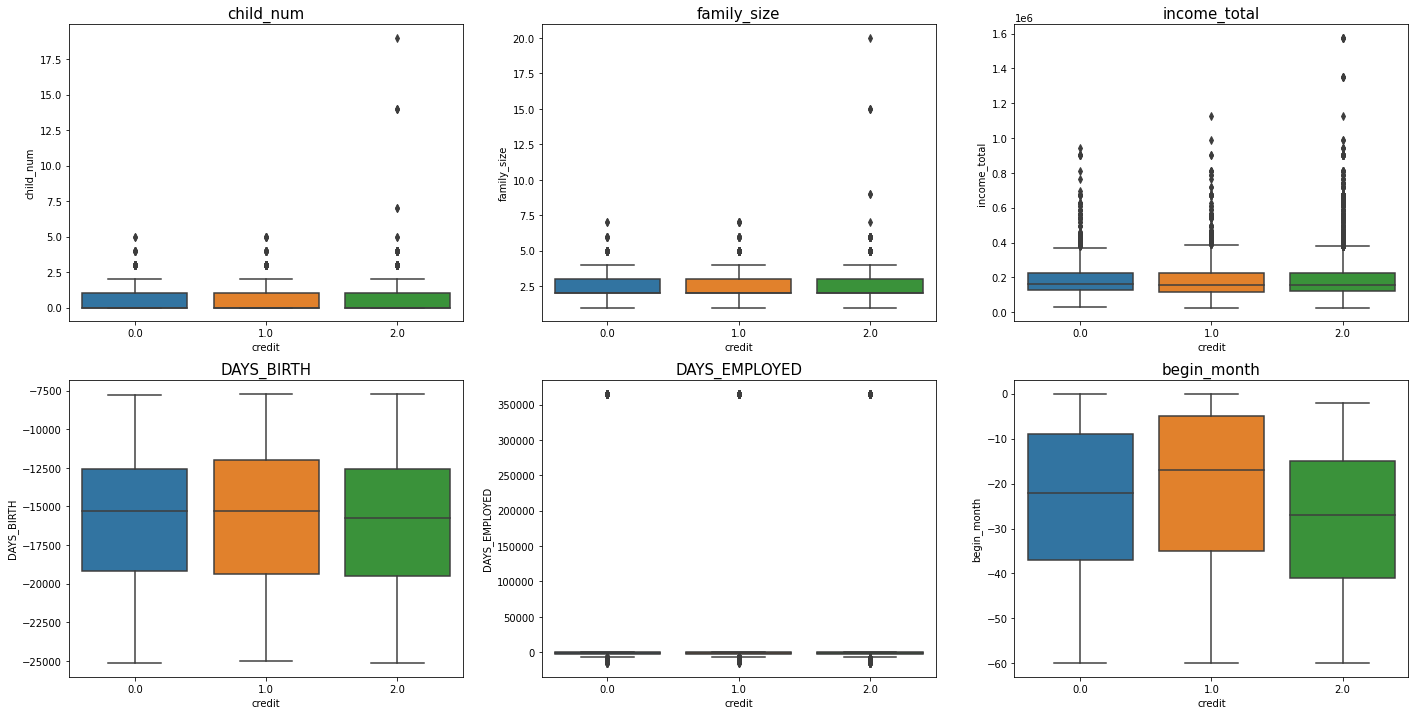

In [ ]:
col_list = ['child_num', 'family_size', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']

plt.figure(figsize=(24, 12)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]

  plt.subplot(2, 3, i+1)
  sns.boxplot(x = train['credit'] , y = train[col])
  plt.title(col, fontsize=15)

# DAYS_EMPLOYED(업무 시작일)이 양수이면 무직인지? 

## 1. DAYS_EMPLOYED(업무 시작일)이 양수일 때 분포 

- income_type이 모두 연금 수급자 
- DAYS_EMPLOYED가 모두 같은 값 
- 따라서 무직으로 보고, 0으로 대체해도 될 것 같음 

In [ ]:
df_emp_positive = train[train.DAYS_EMPLOYED > 0]

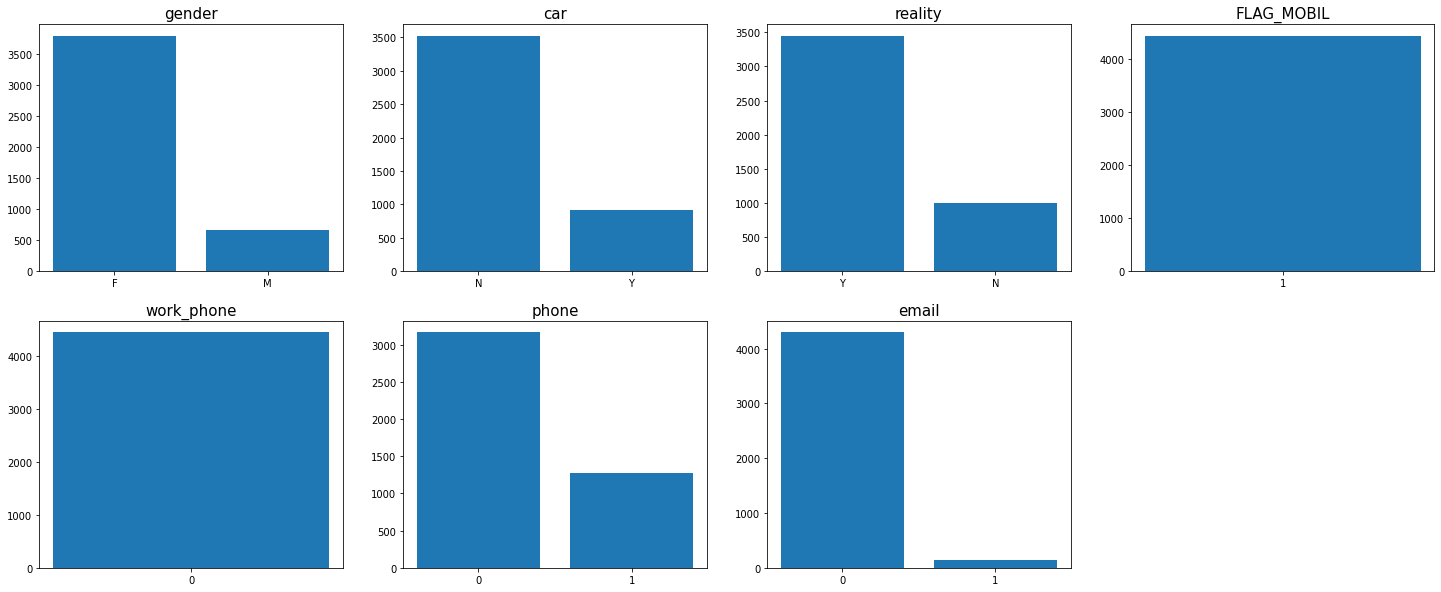

In [ ]:
col_list = ['gender', 'car', 'reality', 'FLAG_MOBIL', 
            'work_phone', 'phone', 'email']

plt.figure(figsize=(25, 10)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]
  vc = df_emp_positive[col].value_counts()

  plt.subplot(2, 4, i+1)
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys())
  plt.title(col, fontsize=15)

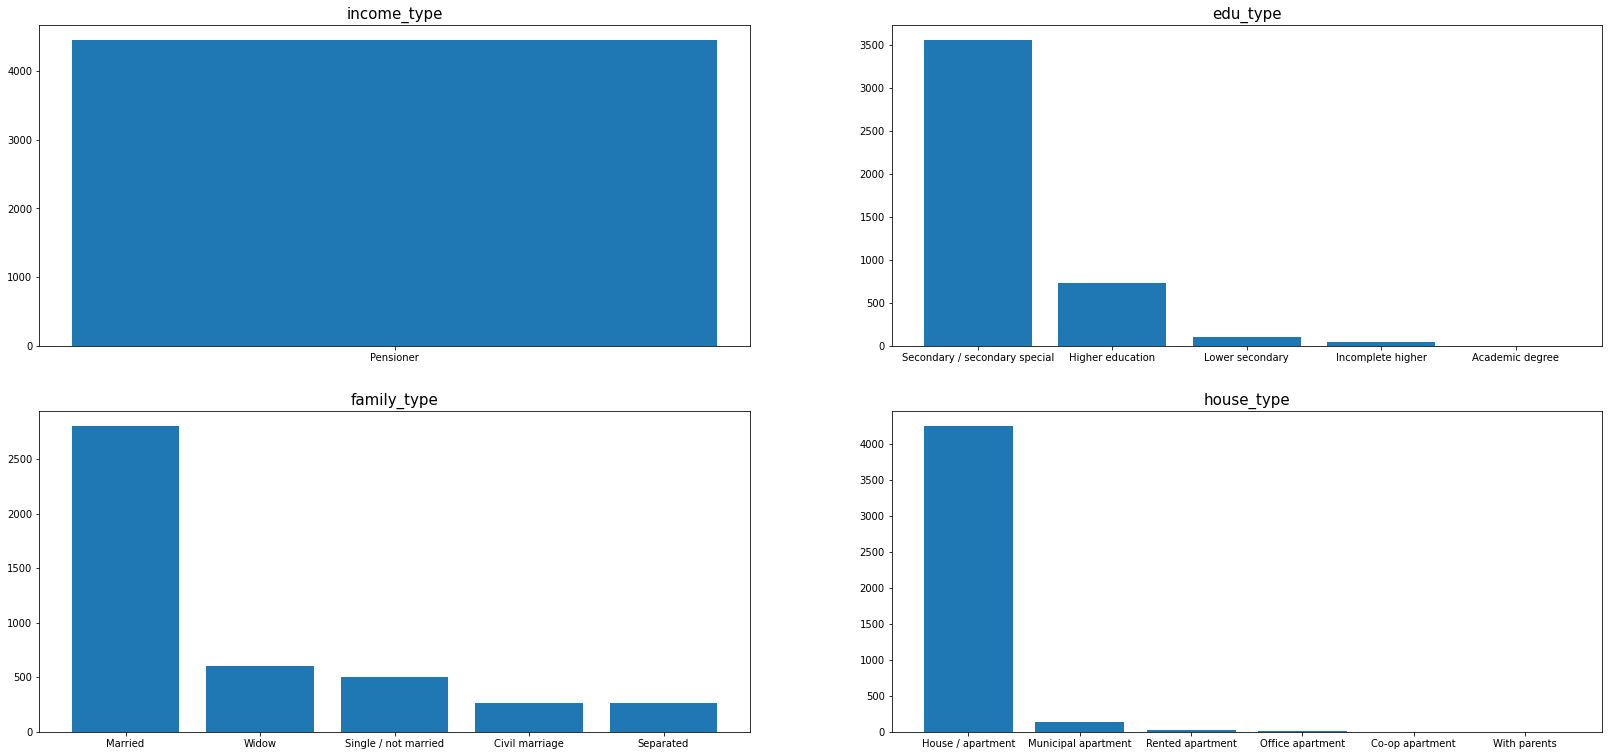

In [ ]:
col_list = ['income_type', 'edu_type', 
            'family_type', 'house_type']

plt.figure(figsize=(28, 13)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]
  vc = df_emp_positive[col].value_counts()

  plt.subplot(2, 2, i+1)
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys())
  plt.title(col, fontsize=15)

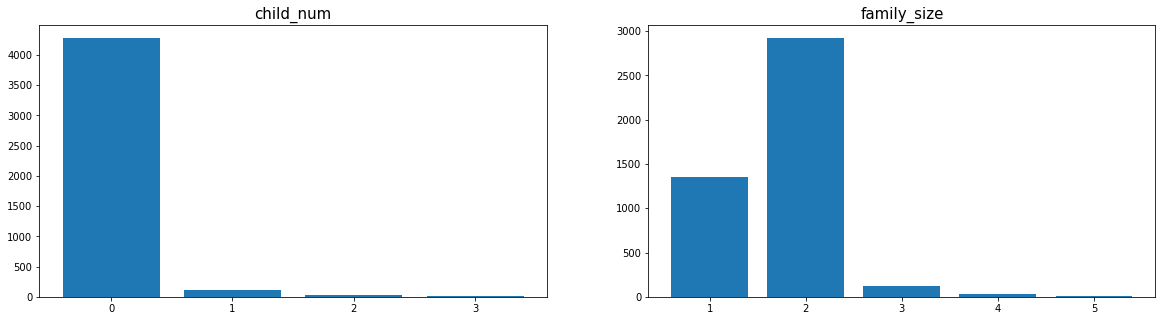

In [ ]:
col_list = ['child_num', 'family_size']

plt.figure(figsize=(20, 5)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]
  vc = df_emp_positive[col].value_counts()

  plt.subplot(1, 2, i+1)
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys())
  plt.title(col, fontsize=15)

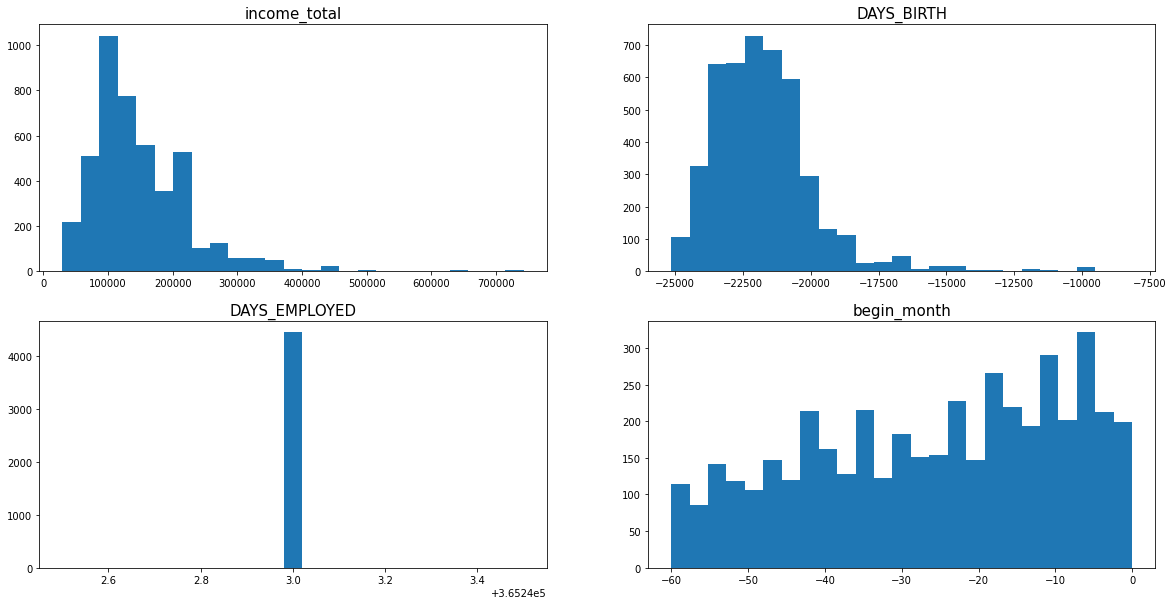

In [ ]:
col_list = ['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']
plt.figure(figsize=(20, 10)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]

  plt.subplot(2, 2, i+1)
  plt.hist(df_emp_positive[col], bins = 25)
  plt.title(col, fontsize=15)

## 2. 양수인 값들을 0으로 대체한 뒤 DAYS_EMPLOYED 분포 비교 

In [ ]:
train.loc[(train.DAYS_EMPLOYED > 0), 'DAYS_EMPLOYED'] = 0
train0.loc[(train0.DAYS_EMPLOYED > 0), 'DAYS_EMPLOYED'] = 0
train1.loc[(train1.DAYS_EMPLOYED > 0), 'DAYS_EMPLOYED'] = 0
train2.loc[(train2.DAYS_EMPLOYED > 0), 'DAYS_EMPLOYED'] = 0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


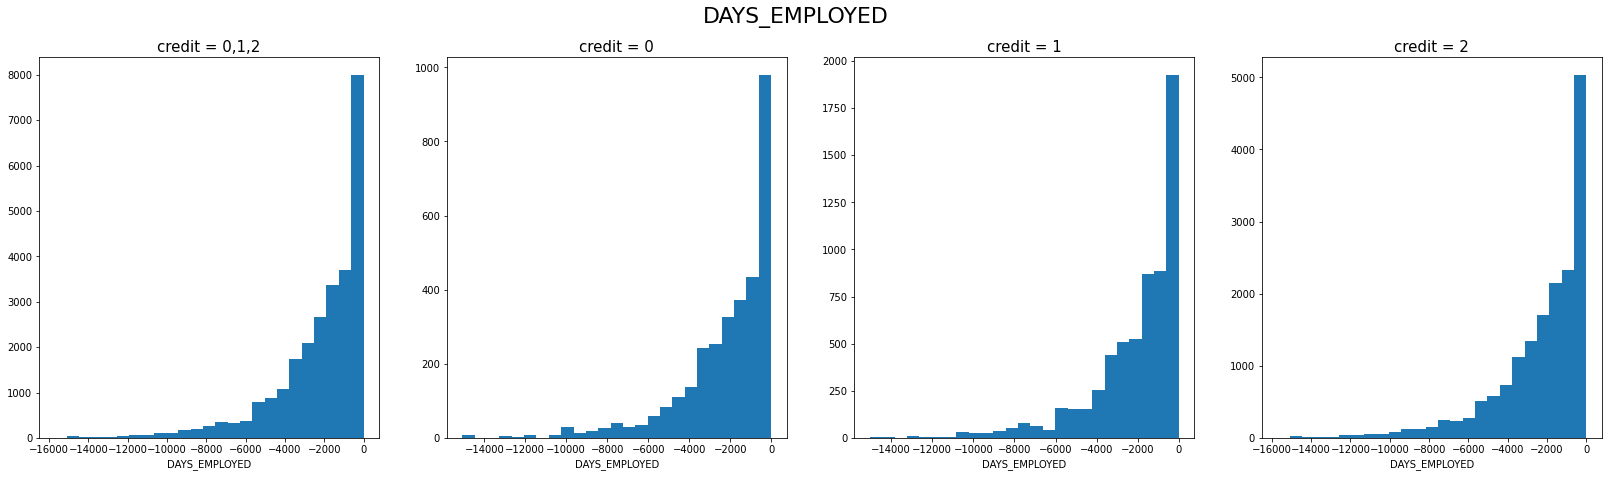

In [ ]:
credit_hist('DAYS_EMPLOYED')

# occyp_type(직업 유형)에서 결측치들을 무직으로 봐도 되는지?

## 1. 전체 분포

- working도 존재하는 것으로 봐서는 무직으로 보는 것은 어려워보임 
- 결혼 한 사람이 많았음 
- 아이가 없고, 2인가구가 대부분 
- 연령대가 좀 있는 편 
- 결측치의 대부분은 은퇴한 노령인구로 추측 


In [ ]:
df_occyp_na = train[train.occyp_type.isna()]

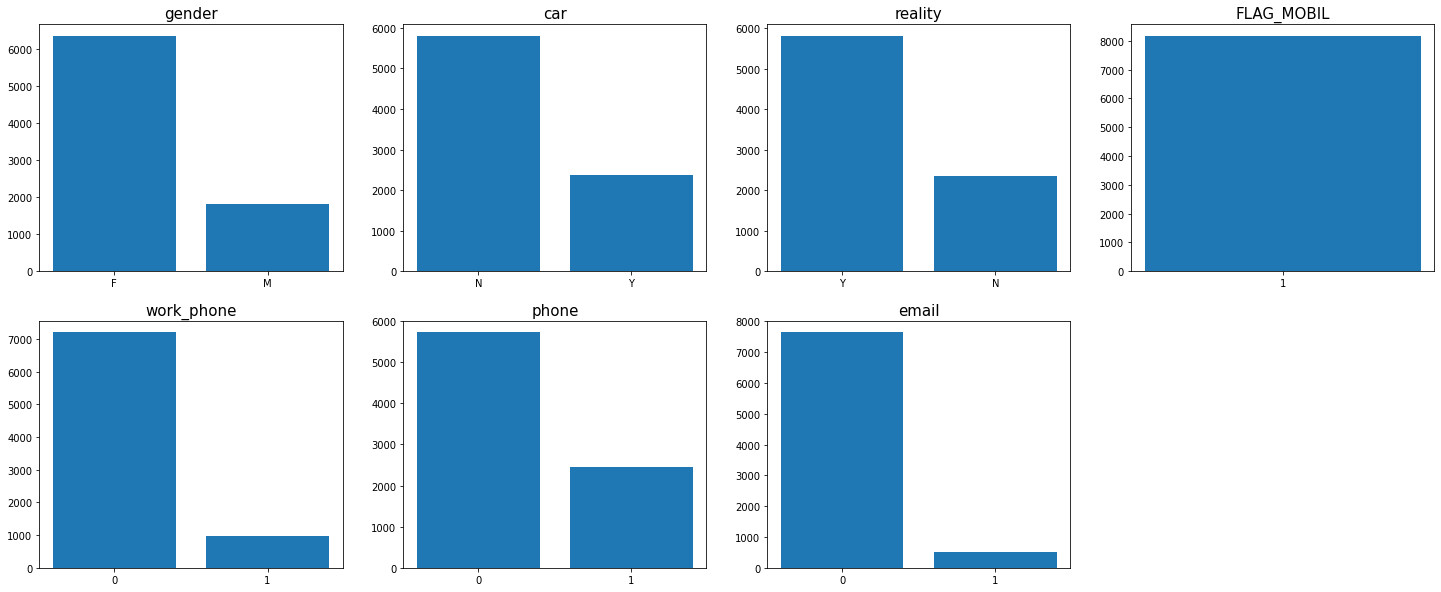

In [ ]:
col_list = ['gender', 'car', 'reality', 'FLAG_MOBIL', 
            'work_phone', 'phone', 'email']

plt.figure(figsize=(25, 10)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]
  vc = df_occyp_na[col].value_counts()

  plt.subplot(2, 4, i+1)
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys())
  plt.title(col, fontsize=15)

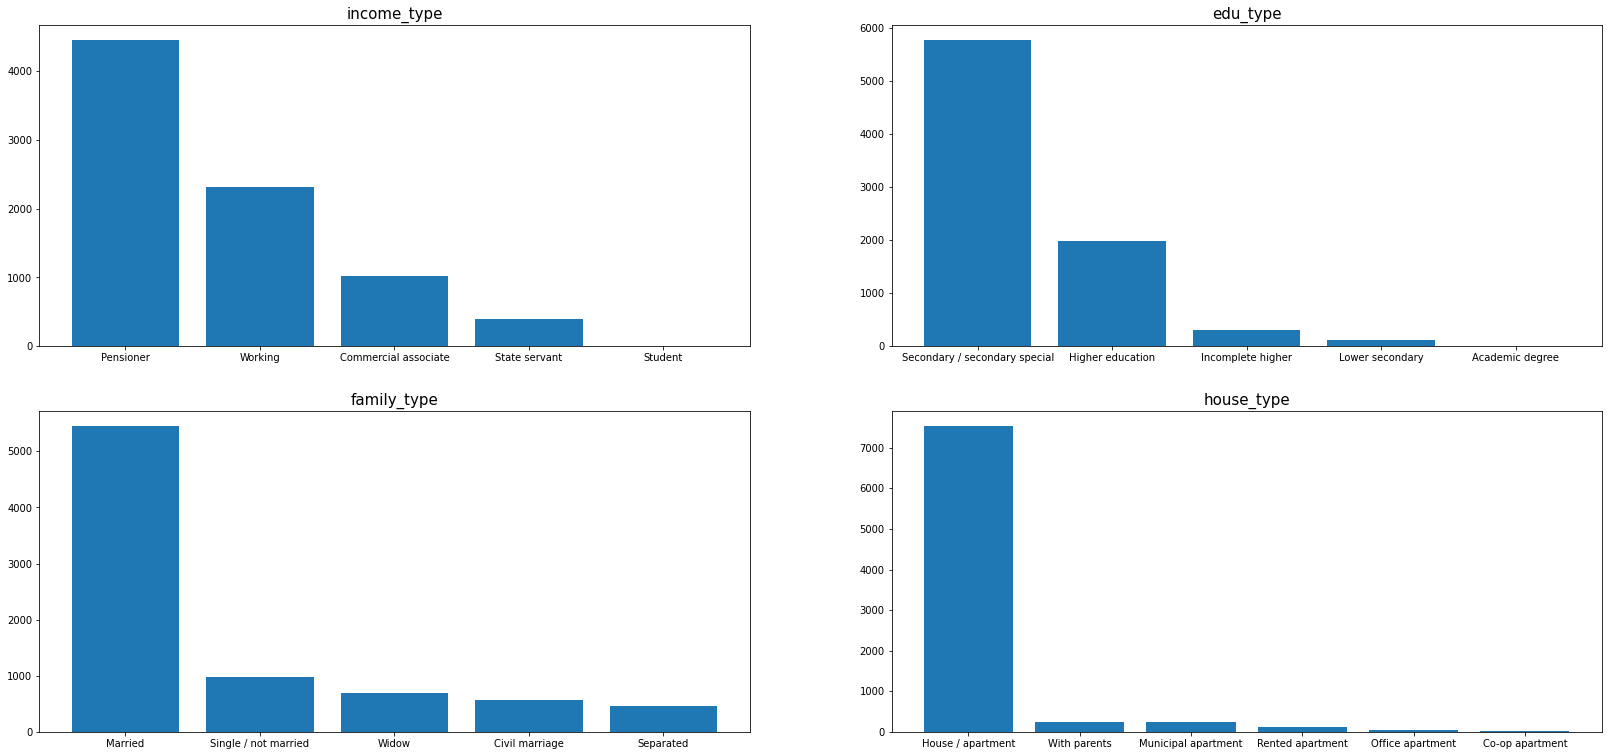

In [ ]:
col_list = ['income_type', 'edu_type', 
            'family_type', 'house_type']

plt.figure(figsize=(28, 13)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]
  vc = df_occyp_na[col].value_counts()

  plt.subplot(2, 2, i+1)
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys())
  plt.title(col, fontsize=15)

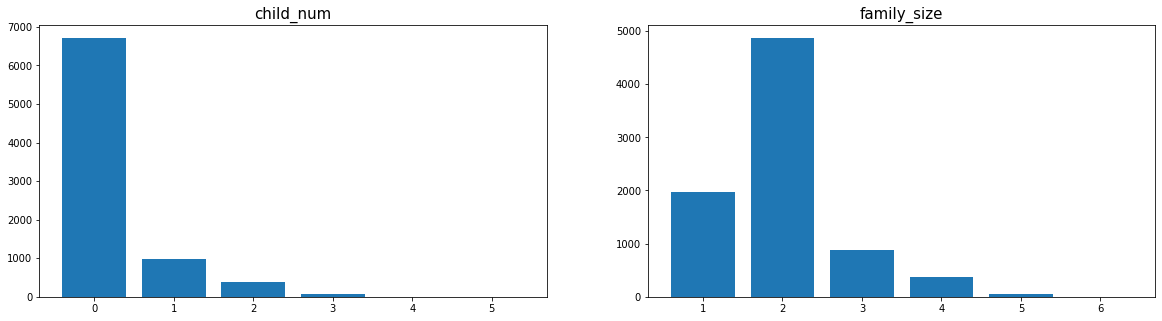

In [ ]:
col_list = ['child_num', 'family_size']

plt.figure(figsize=(20, 5)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]
  vc = df_occyp_na[col].value_counts()

  plt.subplot(1, 2, i+1)
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys())
  plt.title(col, fontsize=15)

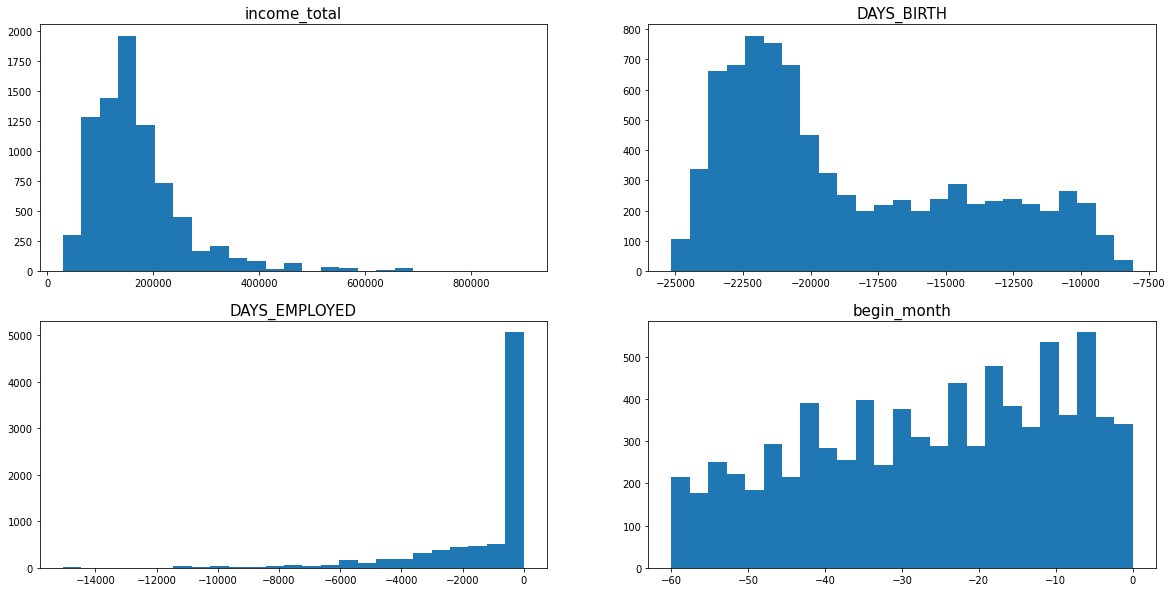

In [ ]:
col_list = ['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']
plt.figure(figsize=(20, 10)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]

  plt.subplot(2, 2, i+1)
  plt.hist(df_occyp_na[col], bins = 25)
  plt.title(col, fontsize=15)

## 2. income_type이 Pensioner일때


- 자녀 수, 가족 수, 나이를 살펴보았을 때 은퇴한 연금 수급자로 추측

In [ ]:
df_occyp_na = train[(train.occyp_type.isna())&(train.income_type == 'Pensioner')]

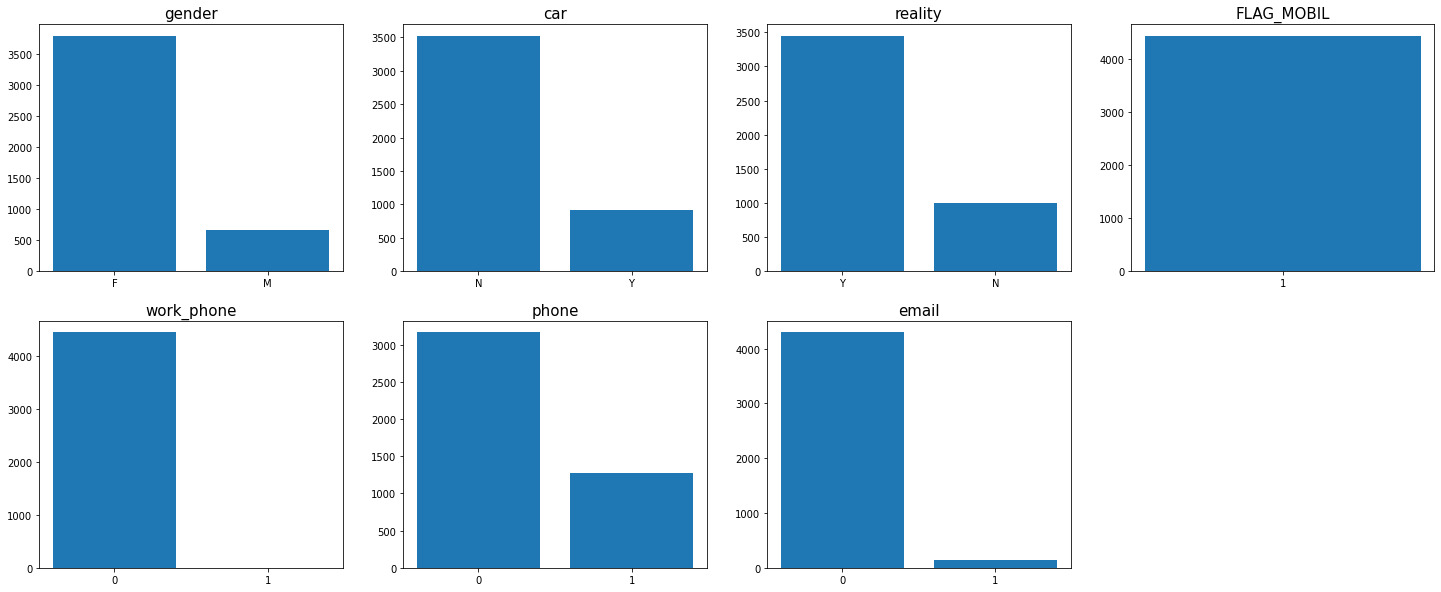

In [ ]:
col_list = ['gender', 'car', 'reality', 'FLAG_MOBIL', 
            'work_phone', 'phone', 'email']

plt.figure(figsize=(25, 10)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]
  vc = df_occyp_na[col].value_counts()

  plt.subplot(2, 4, i+1)
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys())
  plt.title(col, fontsize=15)

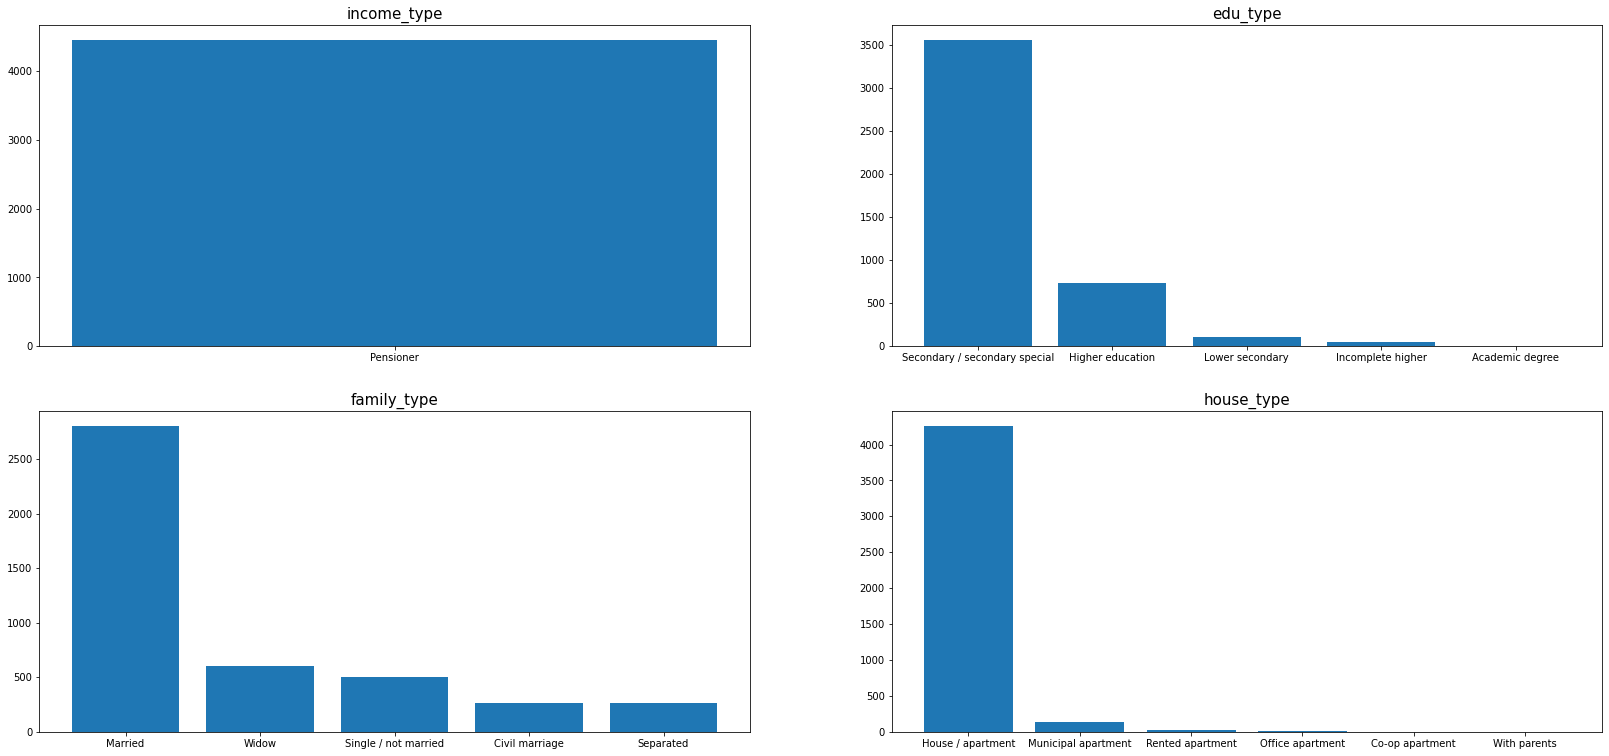

In [ ]:
col_list = ['income_type', 'edu_type', 
            'family_type', 'house_type']

plt.figure(figsize=(28, 13)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]
  vc = df_occyp_na[col].value_counts()

  plt.subplot(2, 2, i+1)
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys())
  plt.title(col, fontsize=15)

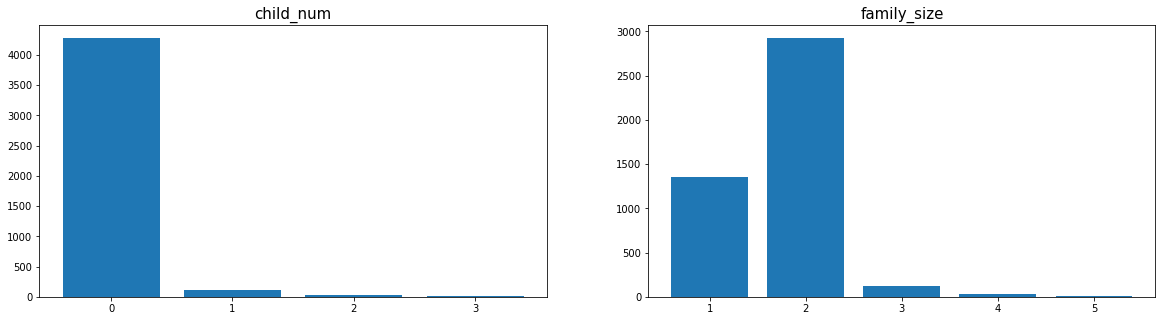

In [ ]:
col_list = ['child_num', 'family_size']

plt.figure(figsize=(20, 5)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]
  vc = df_occyp_na[col].value_counts()

  plt.subplot(1, 2, i+1)
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys())
  plt.title(col, fontsize=15)

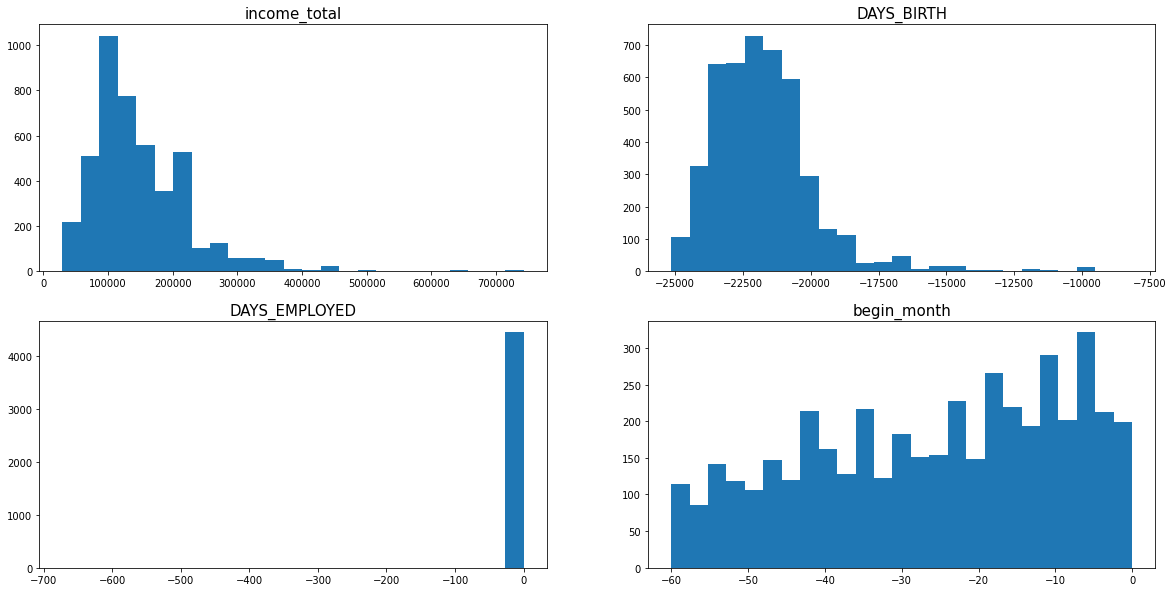

In [ ]:
col_list = ['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']
plt.figure(figsize=(20, 10)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]

  plt.subplot(2, 2, i+1)
  plt.hist(df_occyp_na[col], bins = 25)
  plt.title(col, fontsize=15)

## 3. income_type이 State servant일때

- 근무 일수를 보면 무직으로 보기는 어려워 보임 
- 나이 대와 연간 소득에서 고르게 분포된 것으로 보였기 때문에 income_type과 동일하게 공무원으로 추측  

In [ ]:
df_occyp_na = train[(train.occyp_type.isna())&(train.income_type == 'State servant')]

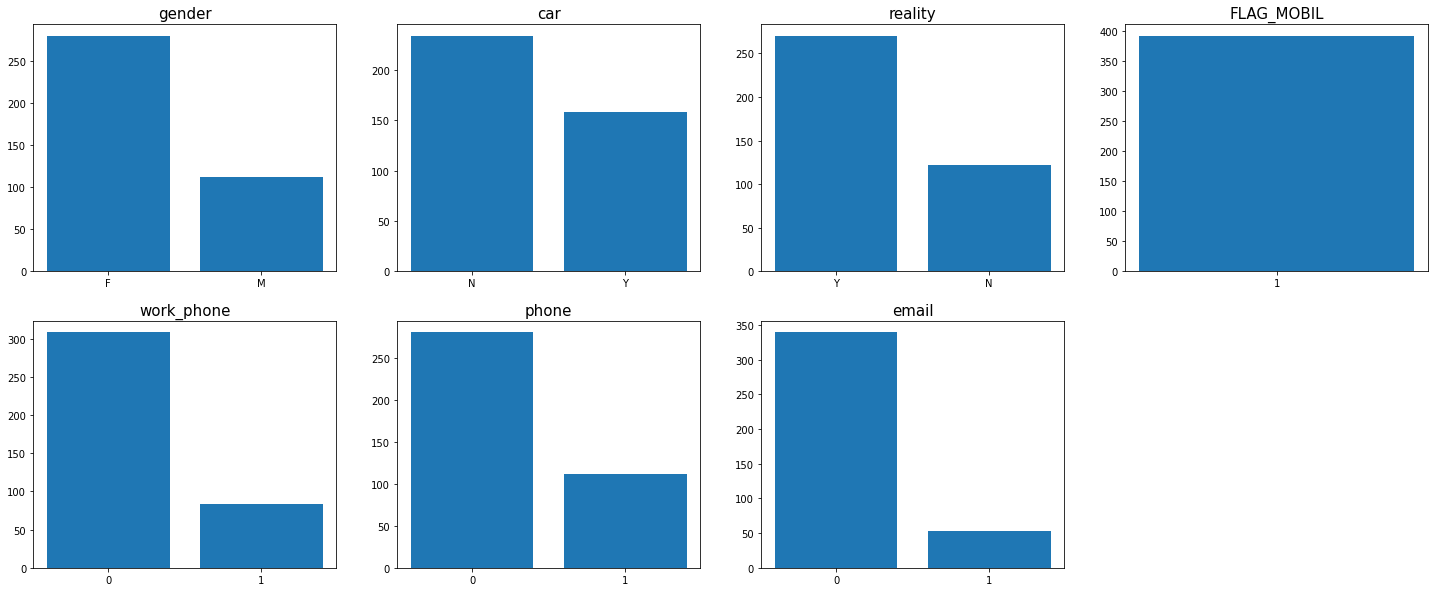

In [ ]:
col_list = ['gender', 'car', 'reality', 'FLAG_MOBIL', 
            'work_phone', 'phone', 'email']

plt.figure(figsize=(25, 10)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]
  vc = df_occyp_na[col].value_counts()

  plt.subplot(2, 4, i+1)
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys())
  plt.title(col, fontsize=15)

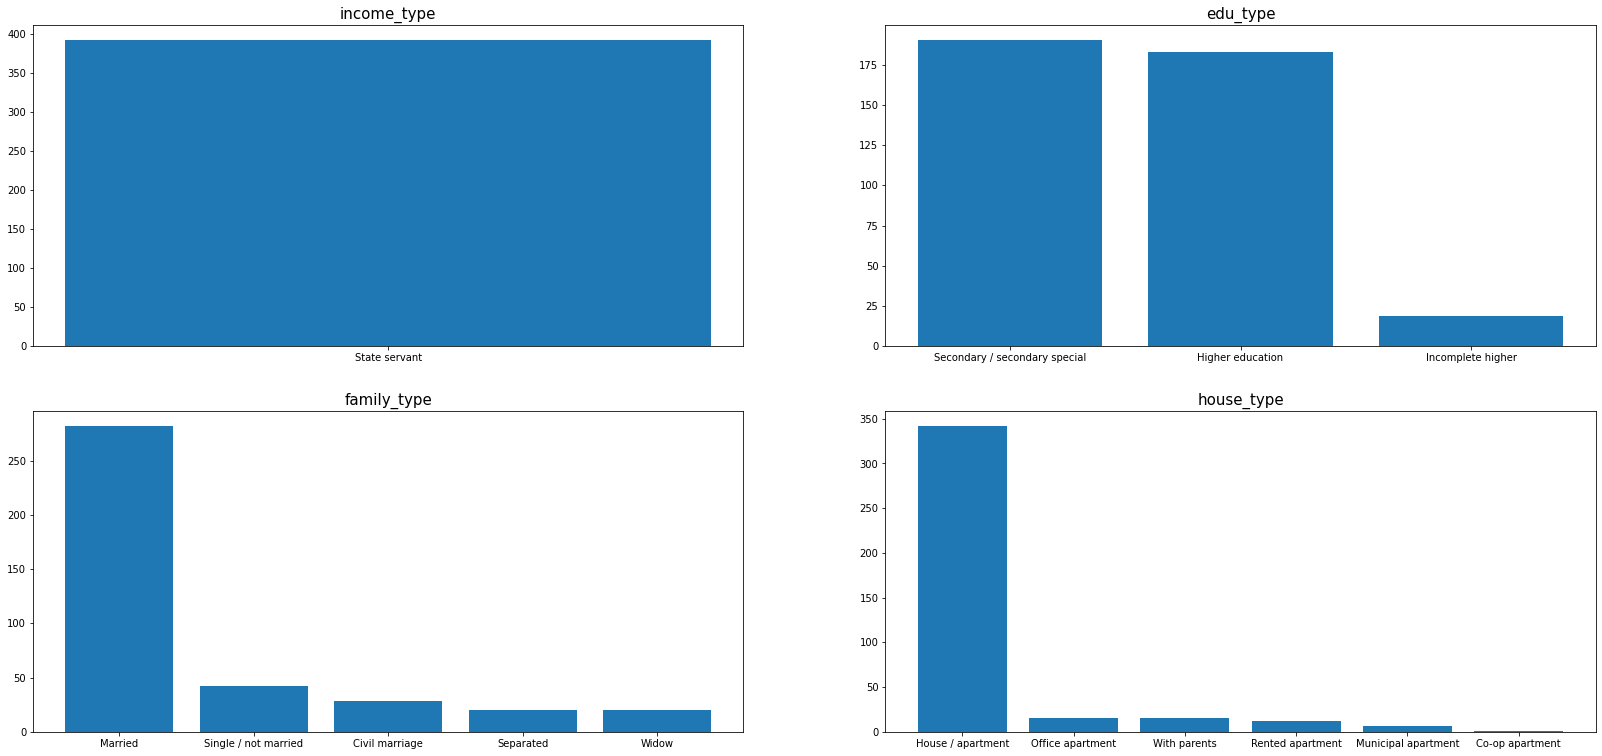

In [ ]:
col_list = ['income_type', 'edu_type', 
            'family_type', 'house_type']

plt.figure(figsize=(28, 13)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]
  vc = df_occyp_na[col].value_counts()

  plt.subplot(2, 2, i+1)
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys())
  plt.title(col, fontsize=15)

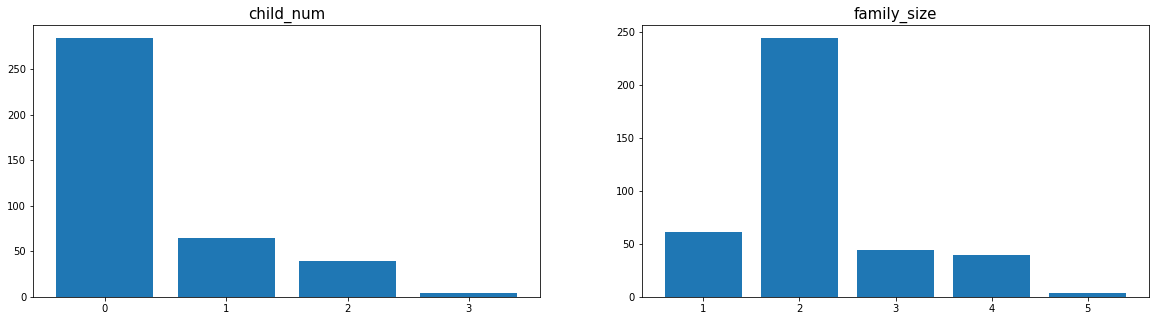

In [ ]:
col_list = ['child_num', 'family_size']

plt.figure(figsize=(20, 5)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]
  vc = df_occyp_na[col].value_counts()

  plt.subplot(1, 2, i+1)
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys())
  plt.title(col, fontsize=15)

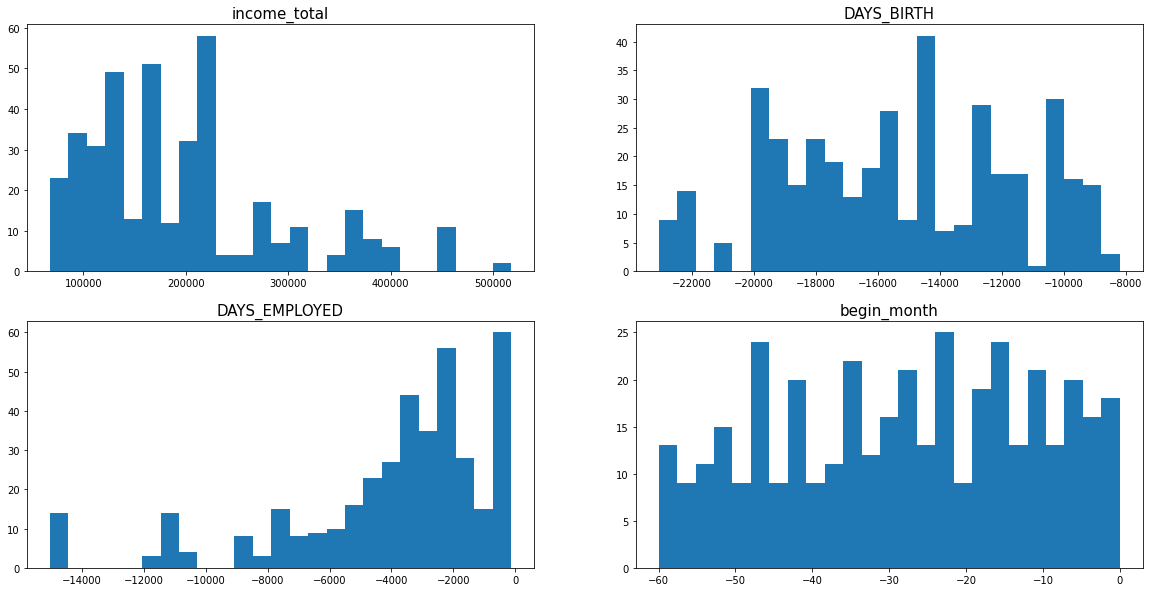

In [ ]:
col_list = ['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']
plt.figure(figsize=(20, 10)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]

  plt.subplot(2, 2, i+1)
  plt.hist(df_occyp_na[col], bins = 25)
  plt.title(col, fontsize=15)

## 4. income_type이 Working일때

- 분포에서 별다른 특징을 보이고 있지 않기 때문에 분류되지 않은 직업군으로 추측 

In [ ]:
df_occyp_na = train[(train.occyp_type.isna())&(train.income_type == 'Working')]

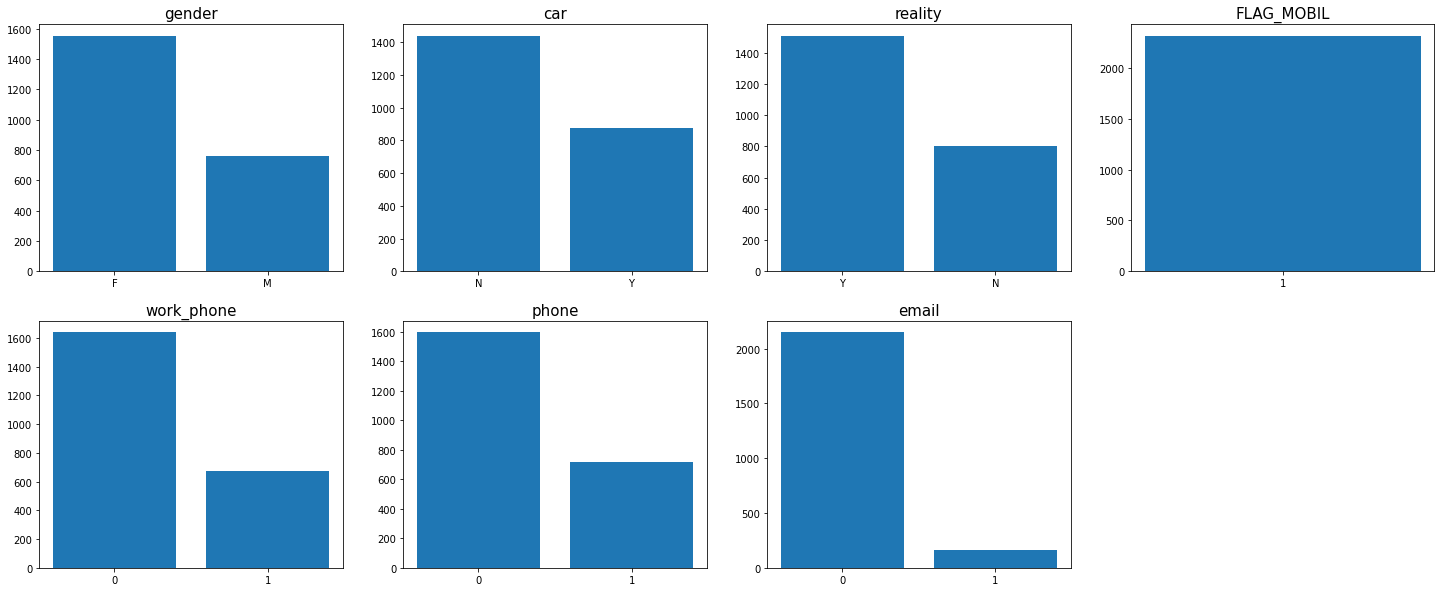

In [ ]:
col_list = ['gender', 'car', 'reality', 'FLAG_MOBIL', 
            'work_phone', 'phone', 'email']

plt.figure(figsize=(25, 10)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]
  vc = df_occyp_na[col].value_counts()

  plt.subplot(2, 4, i+1)
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys())
  plt.title(col, fontsize=15)

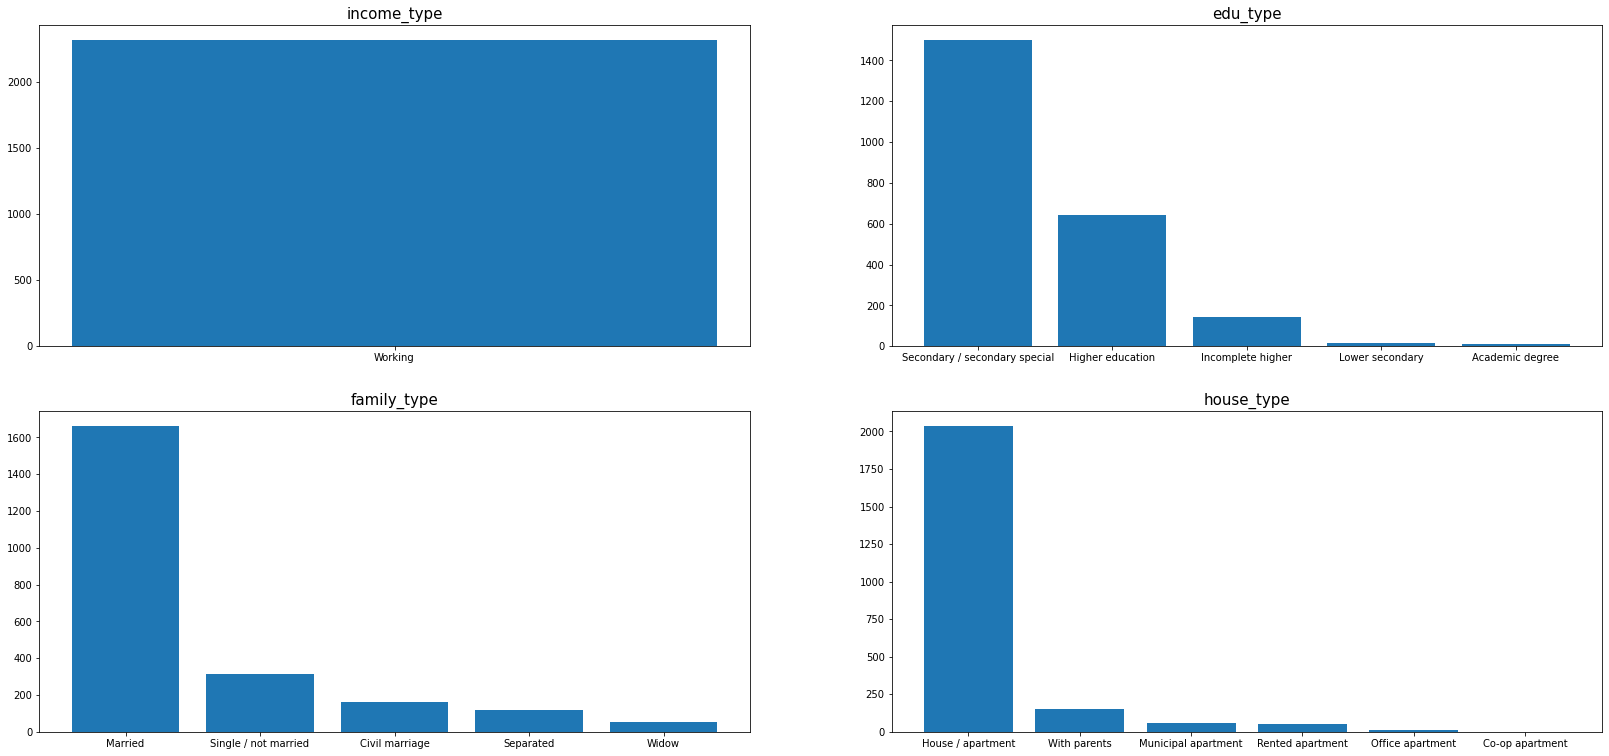

In [ ]:
col_list = ['income_type', 'edu_type', 
            'family_type', 'house_type']

plt.figure(figsize=(28, 13)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]
  vc = df_occyp_na[col].value_counts()

  plt.subplot(2, 2, i+1)
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys())
  plt.title(col, fontsize=15)

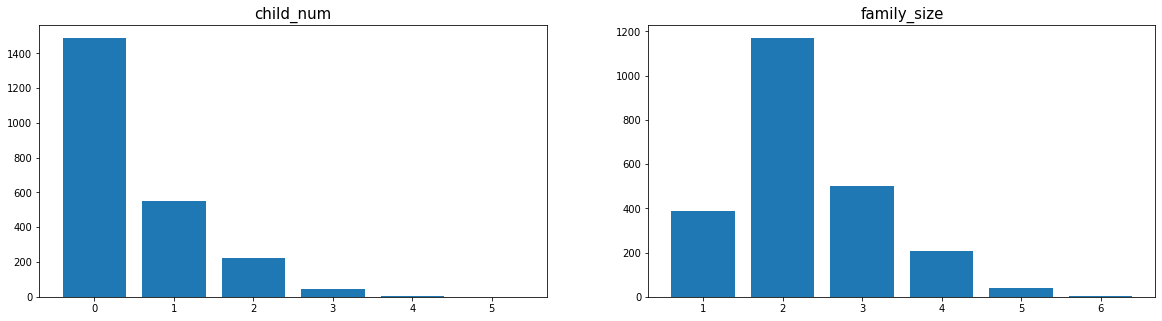

In [ ]:
col_list = ['child_num', 'family_size']

plt.figure(figsize=(20, 5)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]
  vc = df_occyp_na[col].value_counts()

  plt.subplot(1, 2, i+1)
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys())
  plt.title(col, fontsize=15)

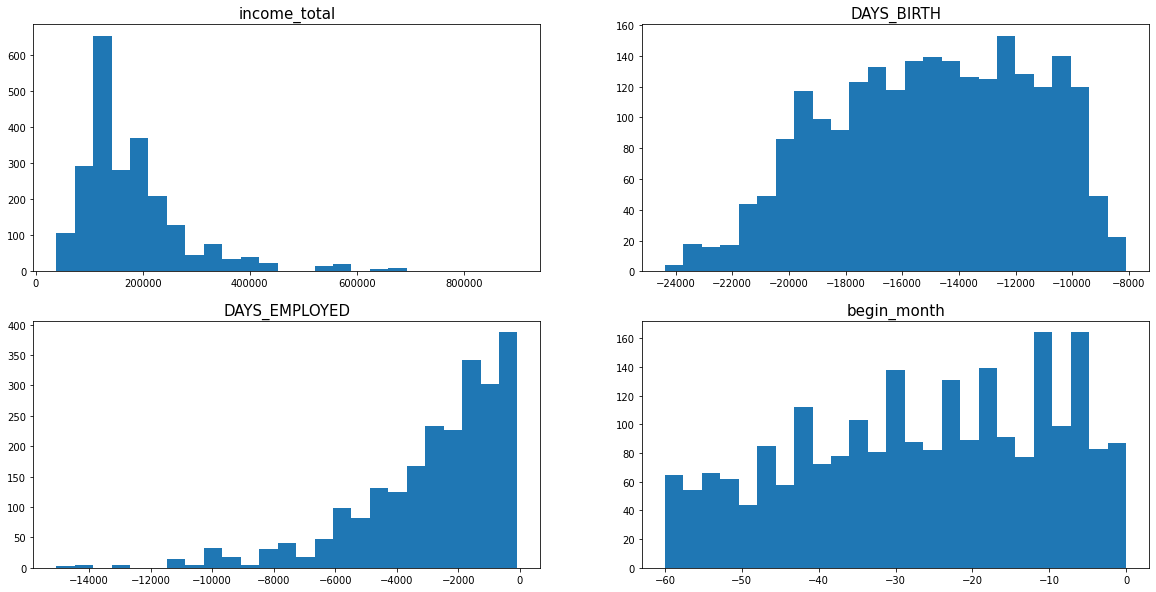

In [ ]:
col_list = ['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']
plt.figure(figsize=(20, 10)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]

  plt.subplot(2, 2, i+1)
  plt.hist(df_occyp_na[col], bins = 25)
  plt.title(col, fontsize=15)

## 5. income_type이 Commercial associate일때

- 이 또한 분포에서 별다른 특징을 보이지 않았음, 분류되지 않은 직업군으로 추측 

In [ ]:
df_occyp_na = train[(train.occyp_type.isna())&(train.income_type == 'Commercial associate')]

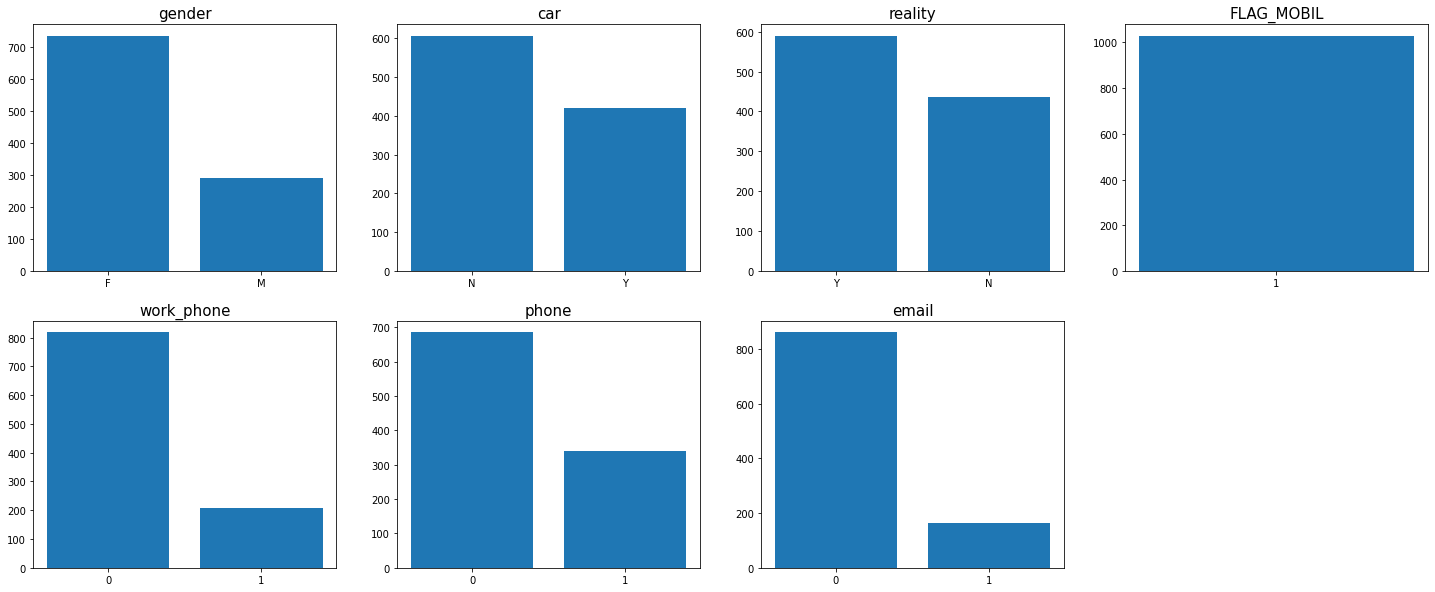

In [ ]:
col_list = ['gender', 'car', 'reality', 'FLAG_MOBIL', 
            'work_phone', 'phone', 'email']

plt.figure(figsize=(25, 10)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]
  vc = df_occyp_na[col].value_counts()

  plt.subplot(2, 4, i+1)
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys())
  plt.title(col, fontsize=15)

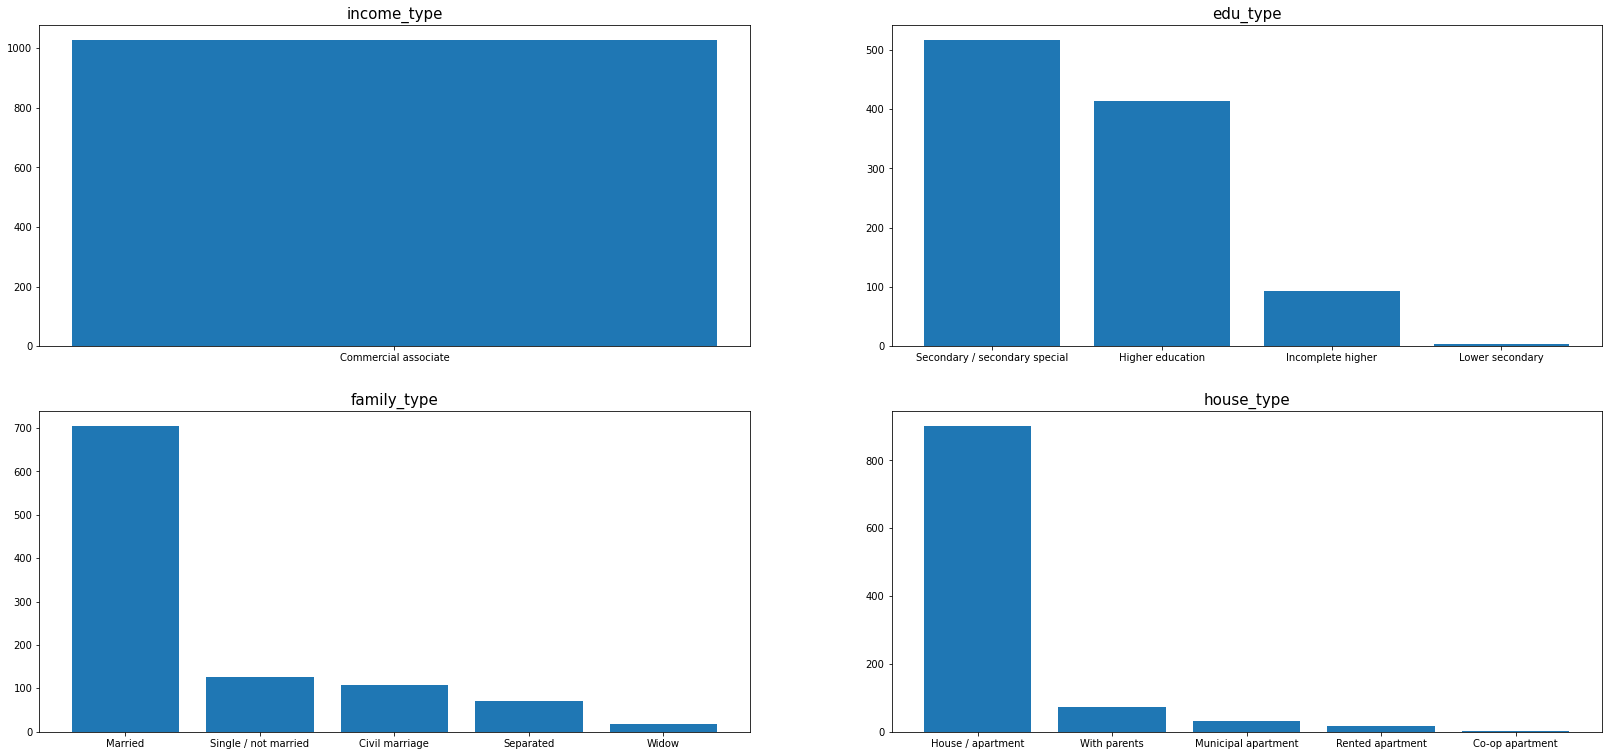

In [ ]:
col_list = ['income_type', 'edu_type', 
            'family_type', 'house_type']

plt.figure(figsize=(28, 13)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]
  vc = df_occyp_na[col].value_counts()

  plt.subplot(2, 2, i+1)
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys())
  plt.title(col, fontsize=15)

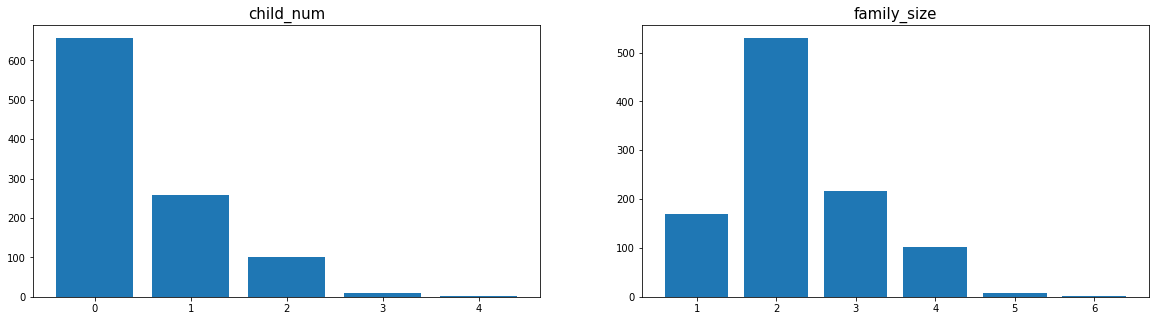

In [ ]:
col_list = ['child_num', 'family_size']

plt.figure(figsize=(20, 5)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]
  vc = df_occyp_na[col].value_counts()

  plt.subplot(1, 2, i+1)
  plt.bar(vc.keys(), vc.values)
  plt.xticks(vc.keys())
  plt.title(col, fontsize=15)

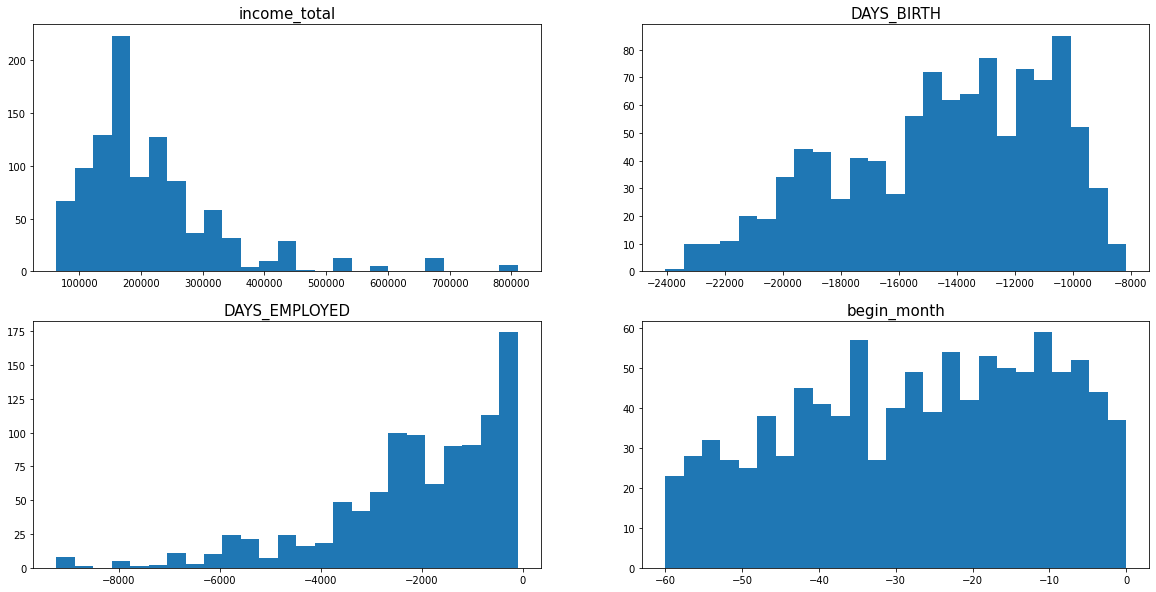

In [ ]:
col_list = ['income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'begin_month']
plt.figure(figsize=(20, 10)) # 가로, 세로 

for i in range(len(col_list)):
  col = col_list[i]

  plt.subplot(2, 2, i+1)
  plt.hist(df_occyp_na[col], bins = 25)
  plt.title(col, fontsize=15)

## 6. income_type이 student일때

- 1명 존재, 무직으로 분류하거나 최빈값으로 대체  

In [ ]:
df_occyp_na = train[(train.occyp_type.isna())&(train.income_type == 'Student')]
df_occyp_na

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
6223,6223,M,N,N,0,135000.0,Student,Higher education,Single / not married,With parents,-9115,-581,1,0,0,1,NaN,1.0,-14.0,2.0


In [ ]:
train[train.income_type == 'Student']

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
2990,2990,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0,-60.0,2.0
3602,3602,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0,-39.0,1.0
6223,6223,M,N,N,0,135000.0,Student,Higher education,Single / not married,With parents,-9115,-581,1,0,0,1,NaN,1.0,-14.0,2.0
8936,8936,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0,-39.0,1.0
11646,11646,F,N,Y,1,112500.0,Student,Secondary / secondary special,Civil marriage,House / apartment,-12127,-795,1,0,0,0,Laborers,3.0,-12.0,2.0
21681,21681,F,N,Y,0,171000.0,Student,Higher education,Married,House / apartment,-18756,-3904,1,0,0,1,Core staff,2.0,-35.0,1.0
23119,23119,F,N,Y,1,112500.0,Student,Secondary / secondary special,Civil marriage,House / apartment,-12127,-795,1,0,0,0,Laborers,3.0,-14.0,2.0


## 7. 정리 

- Pensioner = 은퇴한 연급 수급자 또는 무직으로 대체
- State servant = 분류되지 않은 직업군으로 대체
- Working = 분류되지 않은 직업군으로 대체
- Commercial associate = 분류되지 않은 직업군으로 대체  
- student = 최빈값으로 대체 


# 중복 데이터 존재

- 해결방법1: 중복 데이터 제거 후 진행 
- 해결방법2: 파생 변수 생성해서 중복 데이터 구분 

In [ ]:
train_overlap = train[train.drop(["index", 'begin_month'], axis = 1).duplicated(keep = False)].sort_values(["DAYS_BIRTH","income_total"])
print('중복 데이터 개수:', len(train_overlap))

중복 데이터 개수: 20375


In [ ]:
train_overlap.head(20)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
11314,11314,F,N,Y,0,112500.0,Pensioner,Lower secondary,Married,House / apartment,-24821,0,1,0,0,0,NaN,2.0,-50.0,2.0
11553,11553,F,N,Y,0,112500.0,Pensioner,Lower secondary,Married,House / apartment,-24821,0,1,0,0,0,NaN,2.0,-50.0,2.0
1441,1441,M,Y,Y,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-24780,0,1,0,0,0,NaN,2.0,-50.0,2.0
20250,20250,M,Y,Y,0,180000.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-24780,0,1,0,0,0,NaN,2.0,-50.0,2.0
989,989,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24665,0,1,0,0,0,NaN,2.0,-35.0,2.0
1056,1056,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24665,0,1,0,0,0,NaN,2.0,-35.0,2.0
7241,7241,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24665,0,1,0,0,0,NaN,2.0,-49.0,2.0
12966,12966,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24665,0,1,0,0,0,NaN,2.0,-52.0,2.0
19162,19162,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24665,0,1,0,0,0,NaN,2.0,-52.0,2.0
21722,21722,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-24665,0,1,0,0,0,NaN,2.0,-49.0,2.0
